# Our Bank - Customer Churn Analysis and Prediction

## Business Background & Summary

OurBank is an Australian retail bank that offers customers a range of products and services, including loans, credit cards, transaction and savings accounts. It has one of the largest branch and ATM networks, and prides itself on being a bank that consumers can trust. 

OurBank offers four types of credit cards, ranging in the services provided with each product. These are ranked from their most basic Blue, to Silver, Gold and finally to their most expensive and high-touch Platinum product.

## Problem Statement

OurBank’s consumer credit card business manager is concerned about their customer attrition: Customers keep moving to other banks and leaving OurBank in their dust. This is a big problem, because they know it costs a lot more money to get new customers than it does to retain existing customers.

They want to analyse the data to find out the reason behind this, predict future customers who might leave, and to determine whether or not there are strategies they can use to encourage existing customers to stay. They also want to know if they can improve the data they collect in any way. 

## Project Goal and Objectives

The main goal of the project is:

- Can we identify. with reasonable certainity the customers who are liklely to churn, , that will allow services team to be creative and proactive in their engagement with the customer?

As a data objective, we would ideally also like to idenfify the machine learning algorithm that has the best accuracy and what are some of the most important factors considered by the Algorithm. 



## Loading Base Packages

In [1]:
# import libraries for Wrangling and Visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading Data

In [2]:
# Read the data frame and check sample output
df = pd.read_csv('OurBank_churn_data.csv')
df.sample(3)

Customer_ID     Attrition_Flag  Customer_Age Gender  Dependent_Count  \
816     711927108  Attrited Customer            54      M                3   
947     767753958  Existing Customer            37      M                3   
9535    712341933  Existing Customer            39      M                1   

     Education_Level Marital_Status Income_Category Card_Category  \
816      High School        Married    $80K - $120K          Blue   
947         Graduate        Unknown     $40K - $60K          Blue   
9535        Graduate         Single     $60K - $80K          Gold   

      Months_On_Book  ...  Months_Inactive_Last12Months  \
816               36  ...                             3   
947               31  ...                             1   
9535              36  ...                             3   

      Contacts_Count_Last12Months  Credit_Limit  Total_Revolving_Bal  \
816                             4        9457.0                  350   
947                             2        8504.0                 1956   
9535                            2       34516.0                 1662   

      Avg_Open_To_Buy  Total_Trans_Amt  Total_Amt_Chng_Q4_Q1  \
816            9107.0             1196                 1.024   
947            6548.0             1881                 0.963   
9535          32854.0            13578                 0.751   

      Total_Trans_Count  Total_Count_Chng_Q4_Q1  Avg_Utilization_Ratio  
816                  28                   0.333                  0.037  
947                  51                   0.417                  0.230  
9535                105                   0.615                  0.048  

[3 rows x 21 columns]

From the above a few points that raises some questions are;
 - Although the customers are categorized as Attired, yet they still showing balance in their account
 - Further the balance seem to be a total balance at the time of Attrition, whereas it would have been better, to have balances over a period of time as opposed to a single date to ascertain trends. 

## Understanding Data - Data Dictionary

There are mutiple variables in the dataset which can be divided into 2 categories



### Customer Information

<b>Customer_ID</b> - Unique identifier for the customer holding the account.

<b>Customer_Age</b> - Customer's Age in Years.

<b>Gender</b> - M=Male, F=Female.

<b>Dependent_Count</b> - Number of dependents.

<b>Education_Level</b> - Educational Qualification of the account holder.

<b>Marital_Status</b> - Married, Single, Divorced, Unknown.

<b>Income_Category</b> - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K.

#####

### Customer Bank Relationship Information

<b>Attrition_Flag</b> - If the account is closed, Attrited Customer. If not, Existing Customer.

<b>Card_Category</b> - Type of Card (Blue, Silver, Gold, Platinum).

<b>Months_On_Book</b> - Period of relationship with bank.

<b>Total_Relationship_Count</b> - Total no. of products held by the customer.

<b>Months_Inactive_Last12Months</b> - No. of months inactive in the last 12 months (If attrited, then 12 months before attrition).

<b>Contacts_Count_Last12Months</b> - No. of Contacts in the last 12 months.

<b>Credit_Limit</b> - Credit Limit on the Credit Card.

<b>Total_Revolving_Bal</b> - Total Revolving Balance on the Credit Card.

<b>Avg_Open_To_Buy</b> - The difference between the credit limit assigned to a cardholder account and the present balance on the account. (Average of last 12 months).

<b>Total_Trans_Amt</b> - Total Transaction Amount (Last 12 months). (If attrited, then 12 months before attrition).

<b>Total_Amt_Chng_Q4_Q1</b> - Change in Transaction Amount (Q4 over Q1).

<b>Total_Trans_Count</b> - Total Transaction Count (Last 12 months). (If attrited, then 12 months before attrition).

<b>Total_Count_Chng_Q4_Q1</b> - Change in Transaction Count (Q4 over Q1).

<b>Avg_Utilization_Ratio</b> - Average Card Utilization Ratio (Amount Used/Credit Limit).



##

## Data set review

Starting with shape of the dataset

In [3]:
df.shape

(10127, 21)

The Df has 10127 rows with 21 attributes. Lets look at the 21 attributes in more details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_ID                   10127 non-null  int64  
 1   Attrition_Flag                10127 non-null  object 
 2   Customer_Age                  10127 non-null  int64  
 3   Gender                        10127 non-null  object 
 4   Dependent_Count               10127 non-null  int64  
 5   Education_Level               10127 non-null  object 
 6   Marital_Status                10127 non-null  object 
 7   Income_Category               10127 non-null  object 
 8   Card_Category                 10127 non-null  object 
 9   Months_On_Book                10127 non-null  int64  
 10  Total_Relationship_Count      10127 non-null  int64  
 11  Months_Inactive_Last12Months  10127 non-null  int64  
 12  Contacts_Count_Last12Months   10127 non-null  int64  
 13  C

Looks like none of the columns have any null values. Isn't that a rare find; no missing values!. Lets look at values inside the datasets, is as it should be. 

In [5]:
df['Contacts_Count_Last12Months'] = df['Contacts_Count_Last12Months'].astype('float64')
df['Total_Revolving_Bal'] = df['Total_Revolving_Bal'].astype('float64')
df['Total_Trans_Amt'] = df['Total_Trans_Amt'].astype('float64')
df['Total_Trans_Count'] = df['Total_Trans_Count'].astype('float64')

In [6]:
df.dtypes

Customer_ID                       int64
Attrition_Flag                   object
Customer_Age                      int64
Gender                           object
Dependent_Count                   int64
Education_Level                  object
Marital_Status                   object
Income_Category                  object
Card_Category                    object
Months_On_Book                    int64
Total_Relationship_Count          int64
Months_Inactive_Last12Months      int64
Contacts_Count_Last12Months     float64
Credit_Limit                    float64
Total_Revolving_Bal             float64
Avg_Open_To_Buy                 float64
Total_Trans_Amt                 float64
Total_Amt_Chng_Q4_Q1            float64
Total_Trans_Count               float64
Total_Count_Chng_Q4_Q1          float64
Avg_Utilization_Ratio           float64
dtype: object

In [7]:
# Get unique count for each variable
df.nunique()

Customer_ID                     10127
Attrition_Flag                      2
Customer_Age                       45
Gender                              2
Dependent_Count                     6
Education_Level                     7
Marital_Status                      4
Income_Category                     6
Card_Category                       4
Months_On_Book                     44
Total_Relationship_Count            6
Months_Inactive_Last12Months        7
Contacts_Count_Last12Months         7
Credit_Limit                     6205
Total_Revolving_Bal              1974
Avg_Open_To_Buy                  6813
Total_Trans_Amt                  5033
Total_Amt_Chng_Q4_Q1             1158
Total_Trans_Count                 126
Total_Count_Chng_Q4_Q1            830
Avg_Utilization_Ratio             964
dtype: int64

So looks like most of the values are in order, with 10127 unique customer IDs, 2 Genders, 4 Card Categories. Also the data types for each variables is correct, as it should be, except for Customer ID as it should be non numerical as it is a unique label  (categorical variable without any rank)

In [8]:
print('Numberical Datatypes')
display(df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')])
print('\nString Datatypes')
display(df.dtypes[(df.dtypes != 'int64') & (df.dtypes != 'float64')])

Numberical Datatypes


Customer_ID                       int64
Customer_Age                      int64
Dependent_Count                   int64
Months_On_Book                    int64
Total_Relationship_Count          int64
Months_Inactive_Last12Months      int64
Contacts_Count_Last12Months     float64
Credit_Limit                    float64
Total_Revolving_Bal             float64
Avg_Open_To_Buy                 float64
Total_Trans_Amt                 float64
Total_Amt_Chng_Q4_Q1            float64
Total_Trans_Count               float64
Total_Count_Chng_Q4_Q1          float64
Avg_Utilization_Ratio           float64
dtype: object


String Datatypes


Attrition_Flag     object
Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [9]:
# Changing Customer ID to object datatype
df['Customer_ID'] = df['Customer_ID'].astype('object')
df['Customer_ID'].dtype

dtype('O')

## Basic summary statistics about the data

In [10]:
# Descriptive statistics excluding CustomerId 
df.iloc[:,1:len(df)].describe([0.2,0.5,0.8,1]).T

count         mean          std     min  \
Customer_Age                  10127.0    46.325960     8.016814    26.0   
Dependent_Count               10127.0     2.346203     1.298908     0.0   
Months_On_Book                10127.0    35.928409     7.986416    13.0   
Total_Relationship_Count      10127.0     3.812580     1.554408     1.0   
Months_Inactive_Last12Months  10127.0     2.341167     1.010622     0.0   
Contacts_Count_Last12Months   10127.0     2.455317     1.106225     0.0   
Credit_Limit                  10127.0  8631.953698  9088.776650  1438.3   
Total_Revolving_Bal           10127.0  1162.814061   814.987335     0.0   
Avg_Open_To_Buy               10127.0  7469.139637  9090.685324     3.0   
Total_Trans_Amt               10127.0  4404.086304  3397.129254   510.0   
Total_Amt_Chng_Q4_Q1          10127.0     0.759941     0.219207     0.0   
Total_Trans_Count             10127.0    64.858695    23.472570    10.0   
Total_Count_Chng_Q4_Q1        10127.0     0.712222     0.238086     0.0   
Avg_Utilization_Ratio         10127.0     0.274894     0.275691     0.0   

                                   20%       50%        80%       100%  \
Customer_Age                    39.000    46.000     53.000     73.000   
Dependent_Count                  1.000     2.000      3.000      5.000   
Months_On_Book                  30.000    36.000     42.000     56.000   
Total_Relationship_Count         2.000     4.000      5.000      6.000   
Months_Inactive_Last12Months     1.000     2.000      3.000      6.000   
Contacts_Count_Last12Months      2.000     2.000      3.000      6.000   
Credit_Limit                  2307.200  4549.000  13562.600  34516.000   
Total_Revolving_Bal              0.000  1276.000   1903.000   2517.000   
Avg_Open_To_Buy               1026.000  3474.000  12419.800  34516.000   
Total_Trans_Amt               1914.000  3899.000   4926.000  18484.000   
Total_Amt_Chng_Q4_Q1             0.604     0.736      0.892      3.397   
Total_Trans_Count               41.000    67.000     83.000    139.000   
Total_Count_Chng_Q4_Q1           0.545     0.702      0.853      3.714   
Avg_Utilization_Ratio            0.000     0.176      0.573      0.999   

                                    max  
Customer_Age                     73.000  
Dependent_Count                   5.000  
Months_On_Book                   56.000  
Total_Relationship_Count          6.000  
Months_Inactive_Last12Months      6.000  
Contacts_Count_Last12Months       6.000  
Credit_Limit                  34516.000  
Total_Revolving_Bal            2517.000  
Avg_Open_To_Buy               34516.000  
Total_Trans_Amt               18484.000  
Total_Amt_Chng_Q4_Q1              3.397  
Total_Trans_Count               139.000  
Total_Count_Chng_Q4_Q1            3.714  
Avg_Utilization_Ratio             0.999

In [11]:
# Creating a dataframe for means and 20th, 50th, 80th percentile for all of the attributes
means_df = pd.concat(
    [df.groupby('Attrition_Flag').mean().T,
     df.iloc[:,1:len(df)].describe([0.2,0.5,0.8,1]).T[['mean','20%','50%','80%']]],
    axis=1)
means_df.columns = ['Attired Mean', 'Existing Mean','Overall Mean', 
                    '20th Percentile', '50th Percentile', '80th Percentile']
means_df

Attired Mean  Existing Mean  Overall Mean  \
Customer_Age                     46.659496      46.262118     46.325960   
Dependent_Count                   2.402581       2.335412      2.346203   
Months_On_Book                   36.178242      35.880588     35.928409   
Total_Relationship_Count          3.279656       3.914588      3.812580   
Months_Inactive_Last12Months      2.693301       2.273765      2.341167   
Contacts_Count_Last12Months       2.972342       2.356353      2.455317   
Credit_Limit                   8136.039459    8726.877518   8631.953698   
Total_Revolving_Bal             672.822987    1256.604118   1162.814061   
Avg_Open_To_Buy                7463.216472    7470.273400   7469.139637   
Total_Trans_Amt                3095.025814    4654.655882   4404.086304   
Total_Amt_Chng_Q4_Q1              0.694277       0.772510      0.759941   
Total_Trans_Count                44.933620      68.672588     64.858695   
Total_Count_Chng_Q4_Q1            0.554386       0.742434      0.712222   
Avg_Utilization_Ratio             0.162475       0.296412      0.274894   

                              20th Percentile  50th Percentile  \
Customer_Age                           39.000           46.000   
Dependent_Count                         1.000            2.000   
Months_On_Book                         30.000           36.000   
Total_Relationship_Count                2.000            4.000   
Months_Inactive_Last12Months            1.000            2.000   
Contacts_Count_Last12Months             2.000            2.000   
Credit_Limit                         2307.200         4549.000   
Total_Revolving_Bal                     0.000         1276.000   
Avg_Open_To_Buy                      1026.000         3474.000   
Total_Trans_Amt                      1914.000         3899.000   
Total_Amt_Chng_Q4_Q1                    0.604            0.736   
Total_Trans_Count                      41.000           67.000   
Total_Count_Chng_Q4_Q1                  0.545            0.702   
Avg_Utilization_Ratio                   0.000            0.176   

                              80th Percentile  
Customer_Age                           53.000  
Dependent_Count                         3.000  
Months_On_Book                         42.000  
Total_Relationship_Count                5.000  
Months_Inactive_Last12Months            3.000  
Contacts_Count_Last12Months             3.000  
Credit_Limit                        13562.600  
Total_Revolving_Bal                  1903.000  
Avg_Open_To_Buy                     12419.800  
Total_Trans_Amt                      4926.000  
Total_Amt_Chng_Q4_Q1                    0.892  
Total_Trans_Count                      83.000  
Total_Count_Chng_Q4_Q1                  0.853  
Avg_Utilization_Ratio                   0.573

### Obeservations

 - We do see that clients that had 3 or less products counts, are more prone to churn, whereas 4 or more is a safe bet.
 - Not major difference in months inactive or contacts count, but one of the other indicators could be if a customer had gone inactive at these two fronts, in the last 2 months, that should raise some flags.
 - A big factor that stands out perhaps is the customers who churned had revolving balance of 60% of the overall revolving balance. This can perhaps be more scrutinized in terms of revolving balance to overall balance per card category. 
 - The same principal could be applied to Total transaction count where transactions count for attrited customers was 70% of the overall mean, and perhaps be more scrutinized in terms of different card categories. 
 - Average utilization ratio is also significantly different between the customers who churned and the ones who didnt, where if the utilization falls below 0.2 factor or 20% then this should raise some alarm bells. 

### Looking for Outliers

In [12]:
# Outlier Observation Analysis
cols_with_outliers = []
for feature in df[[col for col in df.columns.to_list() if ((df[col].dtype == 'int64') or ((df[col].dtype == 'float64')))]]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        cols_with_outliers.append(feature)
#     else:
#         print(feature, "no")
display(cols_with_outliers)

['Customer_Age',
 'Months_On_Book',
 'Months_Inactive_Last12Months',
 'Contacts_Count_Last12Months',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Count',
 'Total_Count_Chng_Q4_Q1']

Lets look at each column having outliers to see if we need to remove them from our analysis. 

If we look at min and max for Age and Months on Book, Months_Inactive_Last12Months, Contacts_Count_Last12Months, nothing really stands out as being incorrectly entered data. 

Lets look at Credit Limit

In [13]:
# Filter the dataframe for Credit Limit Outliers
credit_limit_outliers_df = df[(df['Credit_Limit'] < (df['Credit_Limit'].quantile(0.25) - (1.5 * (df['Credit_Limit'].quantile(0.75) - df['Credit_Limit'].quantile(0.25)))))\
  | (df['Credit_Limit'] > (df['Credit_Limit'].quantile(0.75) + (1.5 * (df['Credit_Limit'].quantile(0.75) - df['Credit_Limit'].quantile(0.25)))))]\
[['Credit_Limit','Card_Category','Attrition_Flag']].sort_values(by='Credit_Limit',ascending=False)
credit_limit_outliers_df

Credit_Limit Card_Category     Attrition_Flag
6          34516.0          Gold  Existing Customer
7983       34516.0          Blue  Existing Customer
7207       34516.0        Silver  Attrited Customer
7232       34516.0          Blue  Attrited Customer
7263       34516.0        Silver  Existing Customer
...            ...           ...                ...
3742       23898.0          Blue  Existing Customer
9524       23889.0          Blue  Existing Customer
2671       23870.0          Blue  Attrited Customer
3577       23858.0          Blue  Existing Customer
2347       23848.0          Blue  Existing Customer

[984 rows x 3 columns]

Seems like most of the outliers are in the upper range of the credit iimit. And its very odd though that some of them are carrying a Blue or Silver Category cards. Lets see if there is some influene of this to Churning. 

In [14]:
count_credit_limit_outliers_df = credit_limit_outliers_df.groupby(by=['Card_Category','Attrition_Flag']).size()
count_credit_limit_outliers_df

Card_Category  Attrition_Flag   
Blue           Attrited Customer     87
               Existing Customer    473
Gold           Attrited Customer     17
               Existing Customer     68
Platinum       Attrited Customer      3
               Existing Customer     13
Silver         Attrited Customer     51
               Existing Customer    272
dtype: int64

In [15]:
# df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
#count_credit_limit_outliers_df = credit_limit_outliers_df.groupby(by=['Card_Category','Attrition_Flag']).agg({'Credit_Limit': 'count'})
# Change: groupby state_office and divide by sum
pcts_credit_limit_outliers_df = count_credit_limit_outliers_df.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))
pcts_credit_limit_outliers_df

Card_Category  Attrition_Flag   
Blue           Attrited Customer    15.54
               Existing Customer    84.46
Gold           Attrited Customer    20.00
               Existing Customer    80.00
Platinum       Attrited Customer    18.75
               Existing Customer    81.25
Silver         Attrited Customer    15.79
               Existing Customer    84.21
dtype: float64

It seems as if the card categories didnt had impact on churning percentages, as the percentages are consistent with the overall churning percetages. 

Lets look at Avg_Open_To_Buy

In [16]:
# Filter the dataframe for Avg Open to Buy
outliers_balance_df = df[(df['Avg_Open_To_Buy'] < (df['Avg_Open_To_Buy'].quantile(0.25) - (1.5 * (df['Avg_Open_To_Buy'].quantile(0.75) - df['Avg_Open_To_Buy'].quantile(0.25)))))\
  | (df['Avg_Open_To_Buy'] > (df['Avg_Open_To_Buy'].quantile(0.75) + (1.5 * (df['Avg_Open_To_Buy'].quantile(0.75) - df['Avg_Open_To_Buy'].quantile(0.25)))))]\
[['Avg_Open_To_Buy','Credit_Limit','Total_Revolving_Bal','Attrition_Flag']].sort_values(by='Avg_Open_To_Buy',ascending=False)
outliers_balance_df

Avg_Open_To_Buy  Credit_Limit  Total_Revolving_Bal     Attrition_Flag
10112          34516.0       34516.0                  0.0  Attrited Customer
9047           34516.0       34516.0                  0.0  Attrited Customer
2196           34516.0       34516.0                  0.0  Existing Customer
2201           34516.0       34516.0                  0.0  Attrited Customer
9127           34516.0       34516.0                  0.0  Existing Customer
...                ...           ...                  ...                ...
550            22718.0       22718.0                  0.0  Existing Customer
651            22697.0       23561.0                864.0  Existing Customer
1438           22680.0       25197.0               2517.0  Existing Customer
3577           22679.0       23858.0               1179.0  Existing Customer
4867           22664.0       22664.0                  0.0  Existing Customer

[963 rows x 4 columns]

In [17]:
outliers_balance_df.groupby('Attrition_Flag').size() / outliers_balance_df.groupby('Attrition_Flag').size().sum() * 100

Attrition_Flag
Attrited Customer    16.82243
Existing Customer    83.17757
dtype: float64

So the outliers are because the customers didnt spend much, but this did not influence churning as the percentage again is consistenct with overall churning percentage.

Lets look at Transaction amount and count

In [18]:
# Filter the dataframe for Transaction Amount and Count Outliers
upper_trans_amt_outliers_df = df[(df['Total_Trans_Amt'] > (df['Total_Trans_Amt'].quantile(0.75) + (1.5 * (df['Total_Trans_Amt'].quantile(0.75) - df['Total_Trans_Amt'].quantile(0.25)))))]\
[['Total_Trans_Amt','Credit_Limit','Attrition_Flag']].sort_values(by='Total_Trans_Amt',ascending=False)
upper_trans_amt_outliers_df

Total_Trans_Amt  Credit_Limit     Attrition_Flag
9964           18484.0       10585.0  Existing Customer
10073          17995.0        3750.0  Existing Customer
10097          17744.0        4493.0  Existing Customer
9601           17634.0        8449.0  Existing Customer
9341           17628.0       14581.0  Existing Customer
...                ...           ...                ...
9028            8637.0       10677.0  Existing Customer
9921            8636.0       29865.0  Attrited Customer
9093            8634.0       23355.0  Existing Customer
9231            8629.0       34516.0  Attrited Customer
9959            8620.0        8135.0  Attrited Customer

[896 rows x 3 columns]

In [19]:
upper_trans_amt_outliers_df.groupby('Attrition_Flag').size() / upper_trans_amt_outliers_df.groupby('Attrition_Flag').size().sum() * 100

Attrition_Flag
Attrited Customer     9.821429
Existing Customer    90.178571
dtype: float64

In [20]:
# Filter the dataframe for Transaction Amount and Count Outliers
upper_trans_count_outliers_df = df[(df['Total_Trans_Count'] > (df['Total_Trans_Count'].quantile(0.75) + (1.5 * (df['Total_Trans_Count'].quantile(0.75) - df['Total_Trans_Count'].quantile(0.25)))))]\
[['Total_Trans_Count','Attrition_Flag']].sort_values(by='Total_Trans_Count',ascending=False)
upper_trans_count_outliers_df

Total_Trans_Count     Attrition_Flag
9324              139.0  Existing Customer
9586              138.0  Existing Customer

So the more the transaction amount the lower the probabiliy of Churing. But in terms of outliers, this dosent look like errors in the data.

In terms of change from q4 to q1, we will look at count, to see and that too the lower range outliers, as logic would dictate that those customers who have reduced significanty the utilization of their cards, will have a higher probability of churning. 

In [21]:
lower_count_change_q4q1_outliers_df = df[(df['Total_Count_Chng_Q4_Q1'] < (df['Total_Count_Chng_Q4_Q1'].quantile(0.25) - (1.5 * (df['Total_Count_Chng_Q4_Q1'].quantile(0.75) - df['Total_Count_Chng_Q4_Q1'].quantile(0.25)))))]\
[['Total_Count_Chng_Q4_Q1','Attrition_Flag']].sort_values(by='Total_Count_Chng_Q4_Q1',ascending=False)
lower_count_change_q4q1_outliers_df

Total_Count_Chng_Q4_Q1     Attrition_Flag
2686                   0.227  Existing Customer
8574                   0.227  Attrited Customer
7330                   0.226  Attrited Customer
4367                   0.226  Attrited Customer
5941                   0.222  Attrited Customer
...                      ...                ...
4701                   0.000  Attrited Customer
7207                   0.000  Attrited Customer
3596                   0.000  Attrited Customer
4417                   0.000  Attrited Customer
7165                   0.000  Attrited Customer

[96 rows x 2 columns]

In [22]:
(lower_count_change_q4q1_outliers_df.groupby('Attrition_Flag').size() / lower_count_change_q4q1_outliers_df.groupby('Attrition_Flag').size().sum() * 100).round(2).to_frame().rename(columns={0: "Percent"})

Percent
Attrition_Flag            
Attrited Customer    77.08
Existing Customer    22.92

As suspected yes the higher the change in terms of lower count of q4 to the count of q1, the higher the probability that the customers will churn. But in terms of outliers, it dosent stand out as incorrect data, as these are customers who had just stopped utlizing their cards.

However is there a sweetspot, which can be used an indicator, where probability of churn starts to increase?

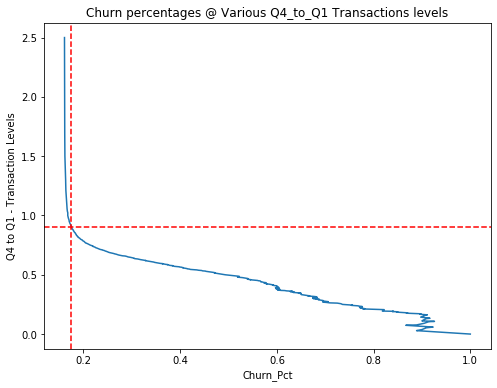

In [23]:
# Ploting Churn percentages @ Various Q4_to_Q1 Transactions Ratio
count_change_q4q1_df = df[df['Attrition_Flag']=='Attrited Customer']['Total_Count_Chng_Q4_Q1'].copy().to_frame()
count_change_q4q1_df = count_change_q4q1_df.drop_duplicates()
count_change_q4q1_df['Churn_Pct'] = count_change_q4q1_df['Total_Count_Chng_Q4_Q1'].apply(lambda x: (df[(df.loc[:,'Total_Count_Chng_Q4_Q1'] <= x)&(df.loc[:,'Attrition_Flag']=='Attrited Customer')].shape[0] / df[(df.loc[:,'Total_Count_Chng_Q4_Q1'] <= x)].shape[0]))
count_change_q4q1_df = count_change_q4q1_df.sort_values(by='Total_Count_Chng_Q4_Q1')
count_change_q4q1_df.plot.line(y='Total_Count_Chng_Q4_Q1', x='Churn_Pct', figsize=(8,6), legend=False,
                              title = 'Churn percentages @ Various Q4_to_Q1 Transactions levels').set_ylabel("Q4 to Q1 - Transaction Levels");
plt.axhline(y = 0.9, color = 'red', linestyle = '--');
plt.axvline(x = 0.175, color = 'red', linestyle = '--');

And it seems like, as the count change figure hits less then 1, the probablity starts to increase significantly. So this can be used as an indicator to reach out to customers and figure out if anything can be done to bring the count levels back up. 

In [24]:
outliers_amt_change_q4q1_df = df[(df['Total_Amt_Chng_Q4_Q1'] < (df['Total_Amt_Chng_Q4_Q1'].quantile(0.25) - (1.5 * (df['Total_Amt_Chng_Q4_Q1'].quantile(0.75) - df['Total_Amt_Chng_Q4_Q1'].quantile(0.25)))))\
  | (df['Total_Amt_Chng_Q4_Q1'] > (df['Total_Amt_Chng_Q4_Q1'].quantile(0.75) + (1.5 * (df['Total_Amt_Chng_Q4_Q1'].quantile(0.75) - df['Total_Amt_Chng_Q4_Q1'].quantile(0.25)))))]\
[['Total_Amt_Chng_Q4_Q1','Attrition_Flag']].sort_values(by='Total_Amt_Chng_Q4_Q1',ascending=False)
outliers_amt_change_q4q1_df 

Total_Amt_Chng_Q4_Q1     Attrition_Flag
12                   3.397  Existing Customer
8                    3.355  Existing Customer
773                  2.675  Existing Customer
2                    2.594  Existing Customer
219                  2.368  Existing Customer
...                    ...                ...
7998                 0.000  Attrited Customer
3596                 0.000  Attrited Customer
7207                 0.000  Attrited Customer
4417                 0.000  Attrited Customer
4701                 0.000  Attrited Customer

[396 rows x 2 columns]

## Lets Look if there are any dupilcates in the dataset

In [25]:
df.duplicated().sum()

0

In [26]:
df[df.duplicated('Customer_ID')]

Empty DataFrame
Columns: [Customer_ID, Attrition_Flag, Customer_Age, Gender, Dependent_Count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_On_Book, Total_Relationship_Count, Months_Inactive_Last12Months, Contacts_Count_Last12Months, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Total_Trans_Count, Total_Count_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]

No duplicates. 

### Target Variable

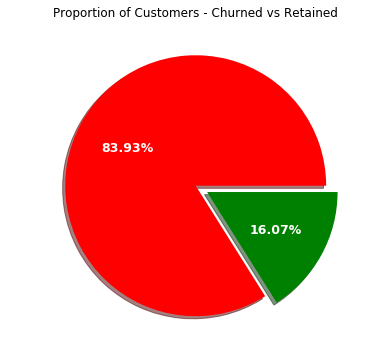

In [27]:
# Plot a Pie Chart for Target Variable
df['Attrition_Flag'].value_counts().plot(kind='pie', labels = ('Retained','Attired'), colors = ['red', 'green'],
                                        figsize=(12, 6),explode = (0, 0.1),shadow=True,autopct='%1.2f%%',ylabel="", 
                                        title = "Proportion of Customers - Churned vs Retained",
                                         textprops={'color':"w",'weight':'bold','fontsize':12.5}); 

The output above shows that the bank has managed to retained 84% of the customers. Lets dig a bit deeper in terms of individual attributed for each category of Churned vs Retained Customers

## Individual Attributes Exploratory Data Analysis

### Lets start with Gender.

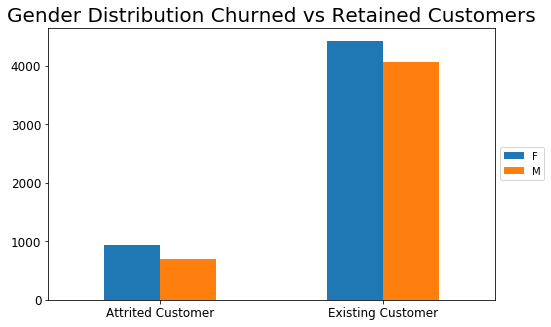

In [28]:
# Plot Gender Bar Chart
df.groupby('Attrition_Flag')['Gender'].value_counts().unstack().plot(kind='bar', rot=0, fontsize=12,
                                                                                   xlabel='', figsize=(8,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Gender Distribution Churned vs Retained Customers', fontsize=20)
plt.show()

In [29]:
(df['Gender'].value_counts()/df['Gender'].value_counts().sum()*100).round(2)

F    52.91
M    47.09
Name: Gender, dtype: float64

In [30]:
# pd.crosstab(data["Gender"], data["Attrition_Flag"])
gender_df = df.groupby('Attrition_Flag')['Gender'].value_counts().unstack().T
gender_df = (100. * gender_df / gender_df.sum()).round(1).astype(str) + '%'
gender_df

Attrition_Flag Attrited Customer Existing Customer
Gender                                            
F                          57.2%             52.1%
M                          42.8%             47.9%

The overall data had 53% Females and 47% Male Customers. The output above shows us out of the customers who churned, Females were 57% , whereas Male were 43% . For the case of retained customers 52% were Females and  48%  are Males, which is equivalent to the overall dataset percentages. 

So in terms of retention there is no clear difference between males and females, but in terms of Churning, Females are more probable to churn then male customers, albiet not by much. 

### Lets now dig into age. 

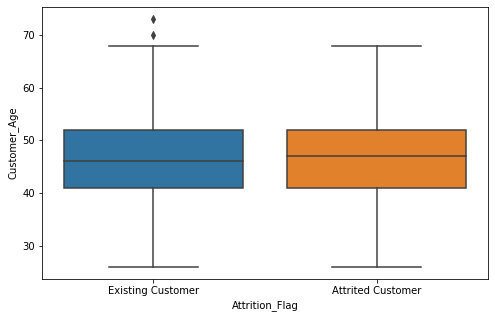

In [31]:
# Plot Age Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="Attrition_Flag",y='Customer_Age'); 

In [32]:
female_churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer') & (df['Gender'] == 'F')]
pd.cut(female_churned_df.Customer_Age,bins=[x for x in range(25,70,5)]).value_counts()

(40, 45]    227
(45, 50]    222
(50, 55]    183
(35, 40]    123
(55, 60]     80
(30, 35]     49
(60, 65]     28
(25, 30]     17
Name: Customer_Age, dtype: int64

In [33]:
male_churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer') & (df['Gender'] == 'M')]
pd.cut(male_churned_df.Customer_Age,bins=[x for x in range(25,70,5)]).value_counts()

(45, 50]    171
(40, 45]    159
(50, 55]    112
(35, 40]     97
(55, 60]     73
(30, 35]     41
(60, 65]     28
(25, 30]     15
Name: Customer_Age, dtype: int64

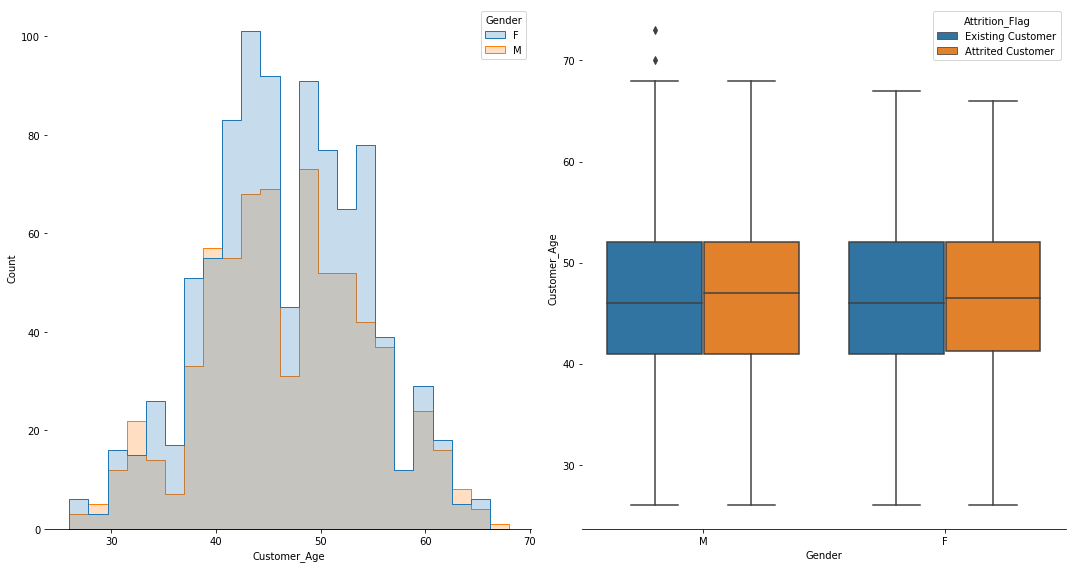

In [34]:
# Age and Gender Hist plots and Box Plots
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(1,2,figsize=(15, 8))
sns.despine(left=True)
sns.histplot(data=churned_df,x='Customer_Age',hue='Gender', element="step",ax=ax[0]);
sns.boxplot(data=df,x="Gender",y='Customer_Age',hue='Attrition_Flag',ax=ax[1]); 
plt.tight_layout()
fig.show();

So we see that both Female and Male follow similar distributions in terms of age, where age bracket of 35 to 60 years dominate the ages which are most likely to churn. However, this is similar to the overall age histogram which is again dominated by customers within this age bracket. 

### Now lets look at the impact of Martial Status on churning 

In [35]:
# Filter on Martial Status
martial_df = df[df['Marital_Status'] != 'Unknown']
summarized_martial_df = martial_df.groupby('Marital_Status')['Attrition_Flag'].value_counts().unstack().T
summarized_martial_df = (100 * summarized_martial_df/summarized_martial_df.sum()).round(2).astype(str) + '%'
summarized_martial_df

Marital_Status    Divorced Married  Single
Attrition_Flag                            
Attrited Customer   16.18%  15.13%  16.94%
Existing Customer   83.82%  84.87%  83.06%

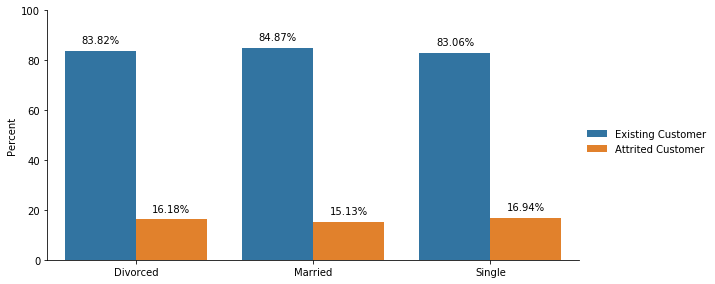

In [36]:
# Plot Martial Status
summarized_martial_df = martial_df.groupby('Marital_Status')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot = sns.catplot(data=summarized_martial_df, x='Marital_Status',y='Percent',hue='Attrition_Flag',kind='bar',legend=False, height=4, aspect=2);
plot.ax.set_ylim(0,100);
plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center')

Nothing really stands out in terms of Martial Status, as the percentage of customers that churned is consistent with the overall percentage  of churned customers, for all of the martial statuses.

### Lets look at Education Level

In [37]:
# Filter Education Level
education_level_df = df[df['Education_Level'] != 'Unknown']
summarized_education_level_df = education_level_df.groupby('Education_Level')['Attrition_Flag'].value_counts().unstack().T
summarized_education_level_df = (100 * summarized_education_level_df/summarized_education_level_df.sum()).round(2).astype(str) + '%'
summarized_education_level_df

Education_Level   College Doctorate Graduate High School Post-Graduate  \
Attrition_Flag                                                           
Attrited Customer   15.2%    21.06%   15.57%       15.2%        17.83%   
Existing Customer   84.8%    78.94%   84.43%       84.8%        82.17%   

Education_Level   Uneducated  
Attrition_Flag                
Attrited Customer     15.94%  
Existing Customer     84.06%

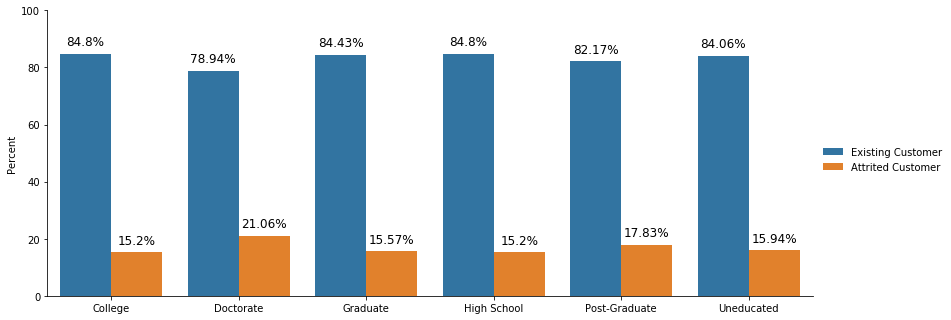

In [38]:
# Bar Plots for Education Level
summarized_education_df = education_level_df.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot = sns.catplot(data=summarized_education_df , x='Education_Level',y='Percent',hue='Attrition_Flag',kind='bar',legend=False, height=4.5, aspect=2.5);
plot.ax.set_ylim(0,100);
plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=12)

So we see that the higher the eduction level the more likely the person can churn. For all of the education levels, the percentages are consistent except for Doctorate which clearly stands out.

### Next lets look at income category. 

In [39]:
# Filter on Income Catefory
income_df = df[df['Income_Category'] != 'Unknown']
summarized_income_df = income_df.groupby('Income_Category')['Attrition_Flag'].value_counts().unstack().T
summarized_income_df = (100 * summarized_income_df/summarized_income_df.sum()).round(2).astype(str) + '%'
summarized_income_df 

Income_Category   $120K + $40K - $60K $60K - $80K $80K - $120K Less than $40K
Attrition_Flag                                                               
Attrited Customer  17.33%      15.14%      13.48%       15.77%         17.19%
Existing Customer  82.67%      84.86%      86.52%       84.23%         82.81%

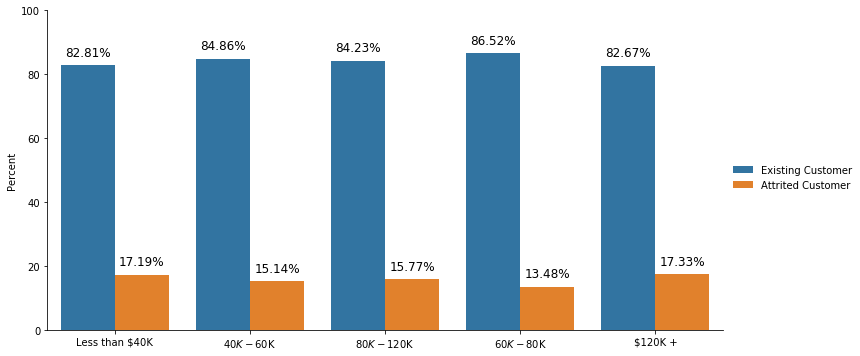

In [40]:
# Bar Plots for Income Category
summarized_income_df = income_df.groupby('Income_Category')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
display_order = df[df['Income_Category'] != 'Unknown']['Income_Category'].value_counts().index.to_list()
plot = sns.catplot(data=summarized_income_df , x='Income_Category',y='Percent',
                   hue='Attrition_Flag',order=display_order,kind='bar',legend=False, height=5, aspect=2);
plot.ax.set_ylim(0,100);
plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=12)

Nothing really stands out in terms of income category levels, as the percentage of customers that churned is consistent with the overall percentage  of churned customers, for all of the income categories.

### Next, lets look at Card Category

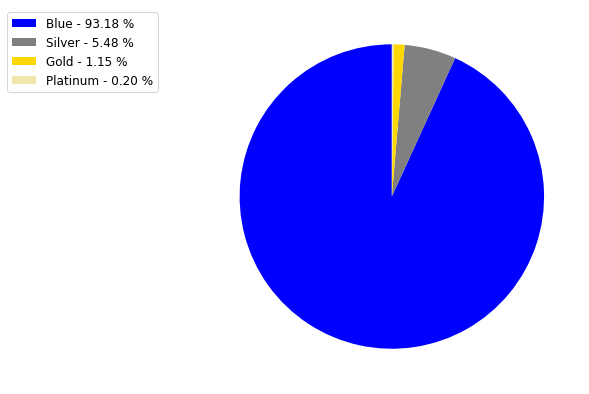

In [41]:
# Plot a pie chart for Card Categories
summarized_card_df = df['Card_Category'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
colors = ['blue', 'grey', 'gold', 'palegoldenrod'] 
summarized_card_df.plot(kind='pie',y='Percent',label='',startangle=90, figsize=(7,7),labels=None, colors=colors)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(summarized_card_df['index'].values.tolist(), 
                                                        summarized_card_df['Percent'].values.tolist())]
plt.legend(labels=labels, loc='right center', bbox_to_anchor=(-0.1, 1.), fontsize=12)
plt.show()

The count is dominated by Blue card holders. So lets look at the transactions value by card categories, to see if other card categories influence, and to what extent. 

In [42]:
card_amt_df = (df.groupby('Card_Category')['Total_Trans_Amt'].sum() / df['Total_Trans_Amt'].sum() * 100).round(3).to_frame().reset_index()
card_amt_df

Card_Category  Total_Trans_Amt
0          Blue           89.396
1          Gold            1.999
2      Platinum            0.404
3        Silver            8.201

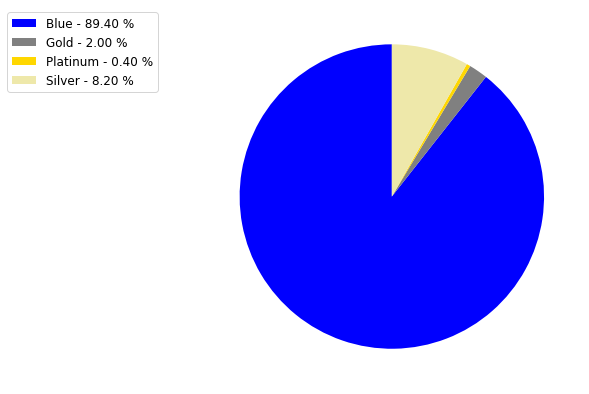

In [43]:
colors = ['blue', 'grey', 'gold', 'palegoldenrod'] 
card_amt_df.plot(kind='pie',y='Total_Trans_Amt',label='',startangle=90, figsize=(7,7),labels=None, colors=colors)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(card_amt_df['Card_Category'].values.tolist(), 
                                                        card_amt_df['Total_Trans_Amt'].values.tolist())]
plt.legend(labels=labels, loc='right center', bbox_to_anchor=(-0.1, 1.), fontsize=12)
plt.show()

So the contribution of each card category's transaction amount is pretty similar to the proportion of the customers for those card categories. And hence, our focus needs to be on card categories of Blue and Silver, which cover 98% of the transactions amount.  

In [44]:
card_type_df = df.groupby('Card_Category')['Attrition_Flag'].value_counts().unstack().T
summarized_card_type_df = (100 * card_type_df/card_type_df.sum()).round(2).astype(str) + '%'
summarized_card_type_df

Card_Category       Blue   Gold Platinum  Silver
Attrition_Flag                                  
Attrited Customer  16.1%  18.1%    25.0%  14.77%
Existing Customer  83.9%  81.9%    75.0%  85.23%

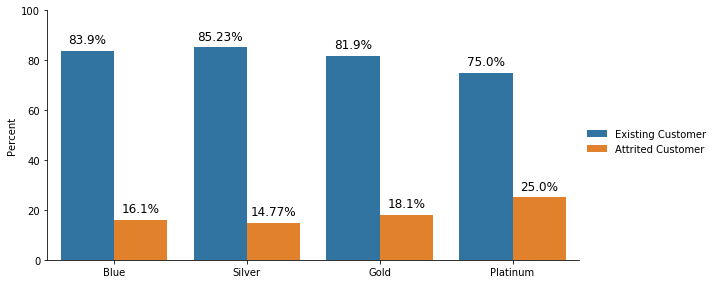

In [45]:
# Plot Card Categories Bar Plot
summarized_card_type_df = df.groupby('Card_Category')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
display_order = df['Card_Category'].value_counts().index.to_list()
plot = sns.catplot(data=summarized_card_type_df , x='Card_Category',y='Percent',
                   hue='Attrition_Flag',order=display_order,kind='bar',legend=False, height=4, aspect=2);
plot.ax.set_ylim(0,100);
plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=12)

It seems the platinum customers churn a whole lot more then other categories on average. However, since the relative proportion of platinum customers is even less then 1%, they will not make any significant impact of churning. 

### Next Lets look at  Dependent Count

In [46]:
# Summary DF for Dependent Count
depd_count_df = df.groupby('Dependent_Count')['Attrition_Flag'].value_counts().unstack().T
summarized_depd_count_df = (100 * depd_count_df/depd_count_df.sum()).round(2).astype(str) + '%'
summarized_depd_count_df

Dependent_Count         0       1       2       3       4       5
Attrition_Flag                                                   
Attrited Customer  14.93%  14.64%  15.71%  17.64%  16.52%  15.09%
Existing Customer  85.07%  85.36%  84.29%  82.36%  83.48%  84.91%

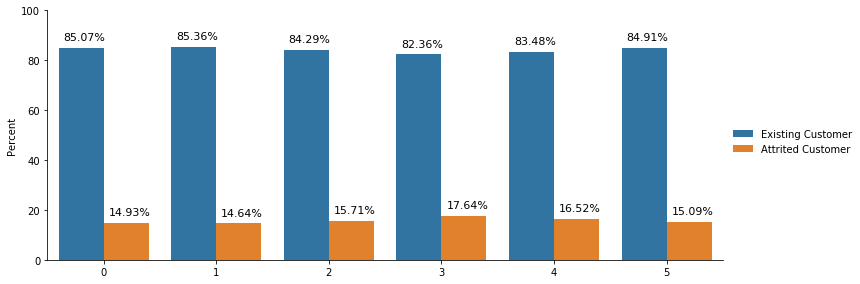

In [47]:
# Bar Plot for Dependents. 
summarized_depd_count_df = df.groupby('Dependent_Count')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot = sns.catplot(data=summarized_depd_count_df , x='Dependent_Count',y='Percent',
                   hue='Attrition_Flag',kind='bar',legend=False, height=4, aspect=2.5);
plot.ax.set_ylim(0,100);
plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.23
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=11)

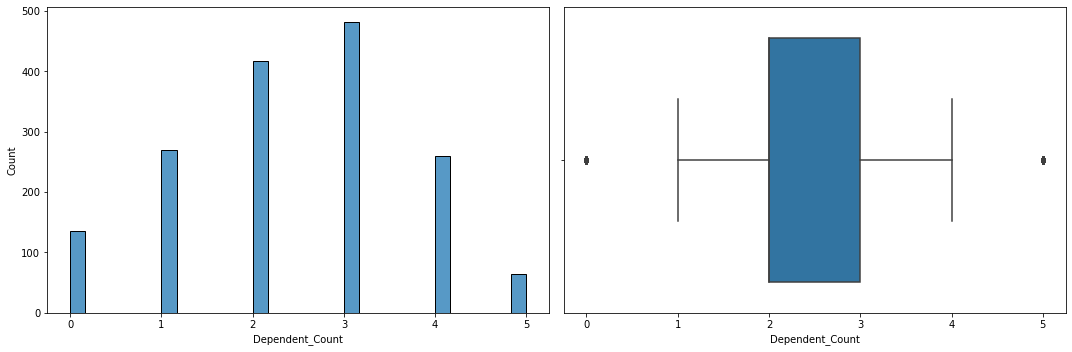

In [48]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=churned_df,x='Dependent_Count',ax=ax[0]);
sns.boxplot(data=churned_df,x='Dependent_Count',ax=ax[1]); 
plt.tight_layout()
fig.show();

The distribution of Dependent counts is fairly normally distributed with a slight right skew, with customers having 2 and 3 dependents more likely to churn. However, the overall attrition percentages is pretty consistent with the overall churned percentage, more or less.

### Next, lets look at Month on Books

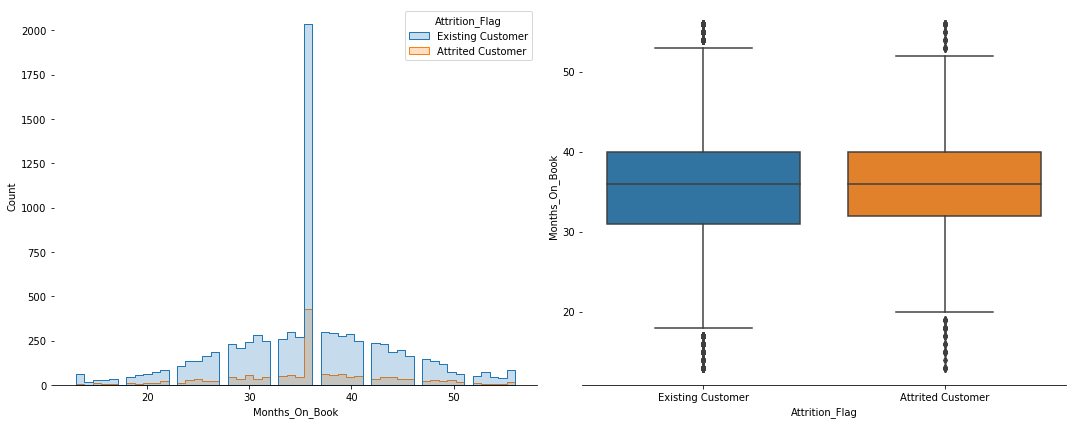

In [49]:
# Histogrm and Box PLots for Month on Books
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.despine(left=True)
sns.histplot(data=df,x='Months_On_Book',hue='Attrition_Flag', element="step",ax=ax[0]);
sns.boxplot(data=df,y='Months_On_Book',x='Attrition_Flag',ax=ax[1]); 
plt.tight_layout()
fig.show();

Nothing really stands out in terms of any significant, although one would expect, that the the churn would be for customers that are still young in thier relationship with the bank, with a mature relationship customers preferring to stay. But we do not see this case, and this is worrying for the bank. 

Lets step out from months and look at the analysis from yearly perspective. 

In [50]:
df['Tenure'] = (df['Months_On_Book'] / 12).apply(np.floor) 

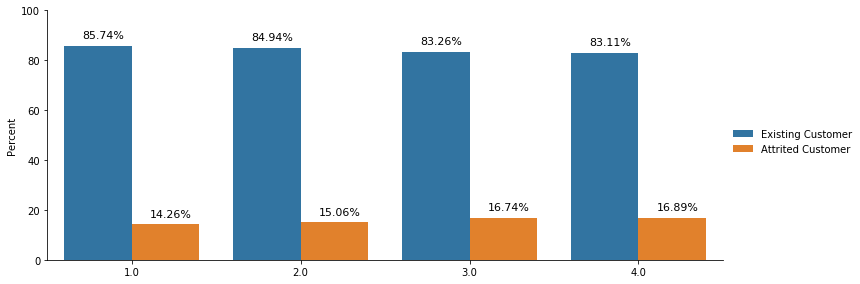

In [51]:
# Bar Plots for Tenure - Percentage Wise
summarized_tenure_df = df.groupby('Tenure')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot = sns.catplot(data=summarized_tenure_df, x='Tenure',y='Percent',
                   hue='Attrition_Flag',kind='bar',legend=False, height=4, aspect=2.5);
plot.ax.set_ylim(0,100);
plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.23
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=11)

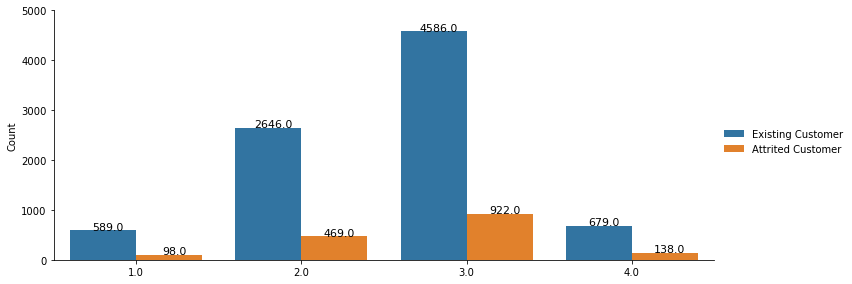

In [52]:
# Bar Plots for Tenure - Absloute Numbers
summarized_tenure_df = df.groupby('Tenure')['Attrition_Flag'].value_counts().rename('Count').reset_index()
plot = sns.catplot(data=summarized_tenure_df, x='Tenure',y='Count',
                   hue='Attrition_Flag',kind='bar',legend=False, height=4, aspect=2.5);
plot.ax.set_ylim(0,5000);
plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() + 0.23
    txt_y = p.get_height() + 5
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=11)

So again nothing really stands out, in terms of differences, but one would expect older relationship customers to not have that high a churn rate. The number of years (tenure) doesn't seem to affect the churn rate.

### Now lets look at Number of Products

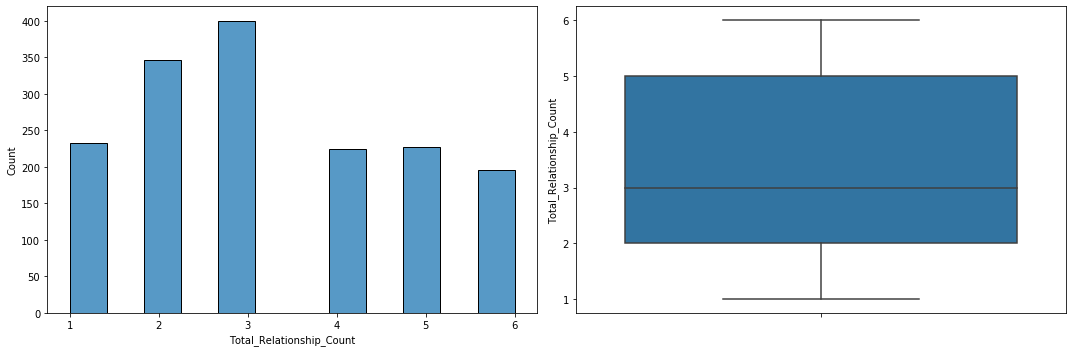

In [53]:
# Histogram and Box plots for # of products
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=churned_df,x='Total_Relationship_Count',ax=ax[0]);
sns.boxplot(data=churned_df,y='Total_Relationship_Count',ax=ax[1]); 
plt.tight_layout()
fig.show();

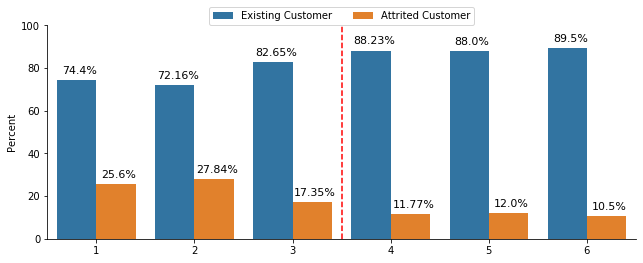

In [54]:
# Pecentage bar plots for Products
summarized_prod_count_df = df.groupby('Total_Relationship_Count')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot = sns.catplot(data=summarized_prod_count_df  , x='Total_Relationship_Count',y='Percent',
                   hue='Attrition_Flag',kind='bar',legend=False, height=3.5, aspect=2.5);
plot.ax.set_ylim(0,100);
#plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.23
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=11)
plt.legend(loc = 'upper center', ncol = 2, bbox_to_anchor = (0.5, 1.11));
plt.axvline(x = 2.5, color = 'red', linestyle = '--');

So as one would expect, the more the products, the less probability of churn, with 3 or more products being a relatively safety net; although when we look at absloute # of churns, then customers having 3 products showed the most amount of churns, which could point out to the fact, that the bank needs to do a better job at properly supporting these customers with atleast 2 or 3 products which in turn decreases customer dissatisfaction and improve the high number of churns for these client categories.

### Lets look at Months_Inactive_Last12Months

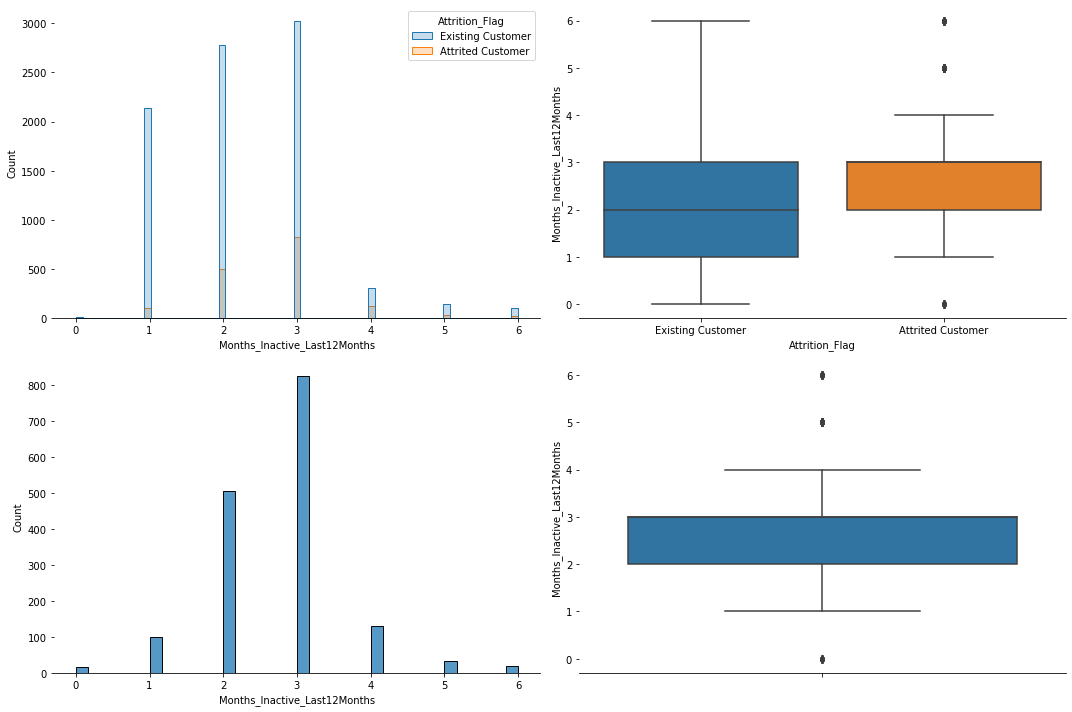

In [55]:
# Histogram and Box plots for Months Inactive feature
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.despine(left=True)
sns.histplot(data=df,x='Months_Inactive_Last12Months',hue='Attrition_Flag', element="step",ax=ax[0,0]);
sns.boxplot(data=df,y='Months_Inactive_Last12Months',x='Attrition_Flag',ax=ax[0,1]); 
sns.histplot(data=churned_df,x='Months_Inactive_Last12Months',ax=ax[1,0]);
sns.boxplot(data=churned_df,y='Months_Inactive_Last12Months',ax=ax[1,1]);
plt.tight_layout()
fig.show();

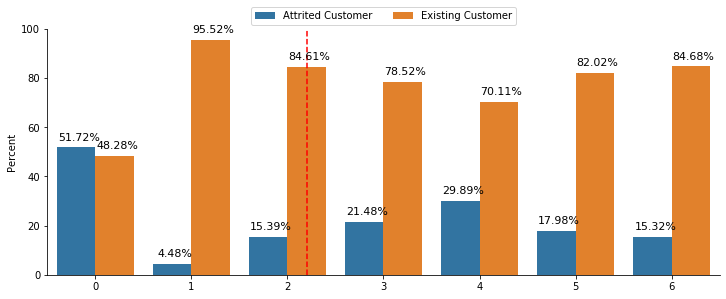

In [56]:
# Pecentage bar plots for Months Inactive
summarized_inactive_months_df = df.groupby('Months_Inactive_Last12Months')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot = sns.catplot(data=summarized_inactive_months_df, x='Months_Inactive_Last12Months',y='Percent',
                   hue='Attrition_Flag',kind='bar',legend=False, height=4, aspect=2.5);
plot.ax.set_ylim(0,100);
#plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.23
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=11)
plt.legend(loc = 'upper center', ncol = 2, bbox_to_anchor = (0.5, 1.11));
plt.axvline(x = 2.2, color = 'red', linestyle = '--');

From the above we can see that, if the customer had going 3 - 4 months being inactive, the risk of churning shows a significant increase. 


### Next Lets look At Contacts Count Last 12 Month

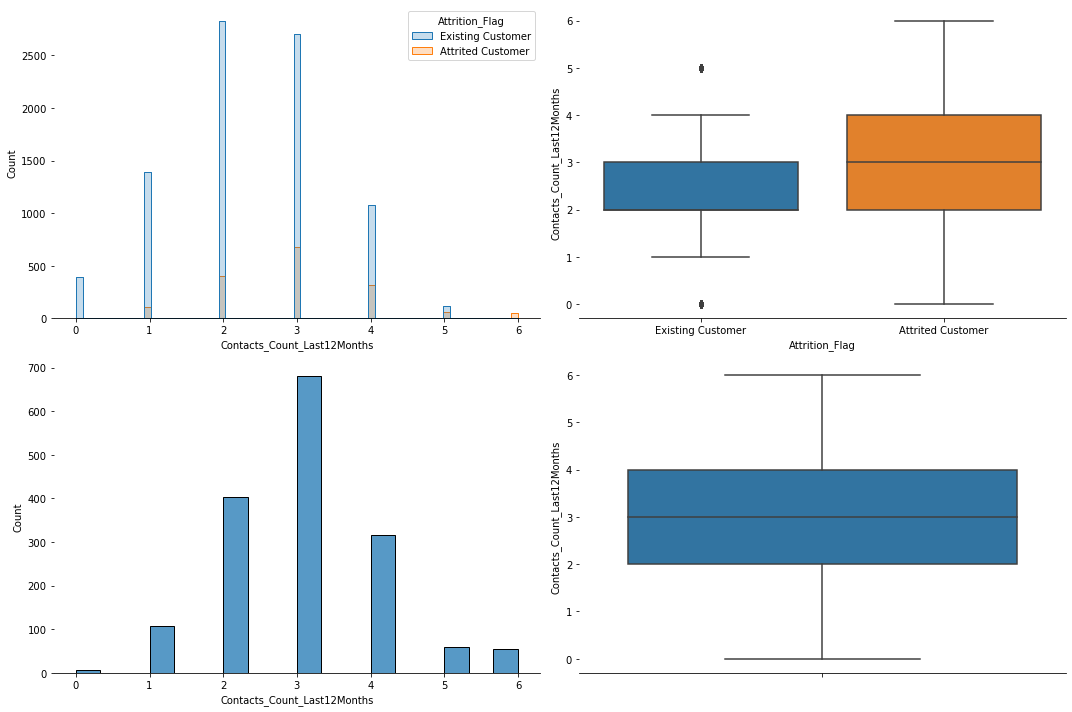

In [57]:
# Histogram and Box plots for Contacts_Count_Last12Months
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.despine(left=True)
sns.histplot(data=df,x='Contacts_Count_Last12Months',hue='Attrition_Flag', element="step",ax=ax[0,0]);
sns.boxplot(data=df,y='Contacts_Count_Last12Months',x='Attrition_Flag',ax=ax[0,1]); 
sns.histplot(data=churned_df,x='Contacts_Count_Last12Months',ax=ax[1,0]);
sns.boxplot(data=churned_df,y='Contacts_Count_Last12Months',ax=ax[1,1]);
plt.tight_layout()
fig.show();

posx and posy should be finite values
posx and posy should be finite values


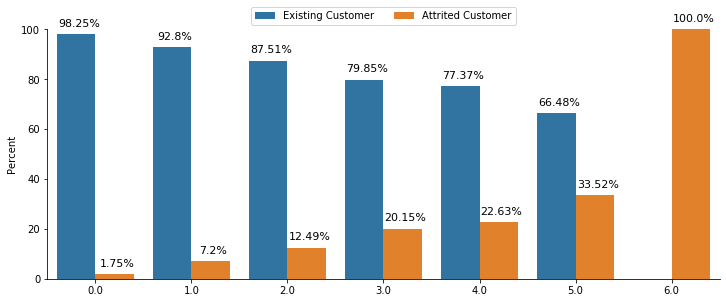

In [58]:
# Pecentage bar plots for Contacts_Count_Last12Months
summarized_contacts_last12months_df = df.groupby('Contacts_Count_Last12Months')['Attrition_Flag'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot = sns.catplot(data=summarized_contacts_last12months_df, x='Contacts_Count_Last12Months',y='Percent',
                   hue='Attrition_Flag',kind='bar',legend=False, height=4, aspect=2.5);
plot.ax.set_ylim(0,100);
#plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.23
    txt_y = p.get_height() + 3
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=11)
plt.legend(loc = 'upper center', ncol = 2, bbox_to_anchor = (0.5, 1.11));
#plt.axvline(x = 2.2, color = 'red', linestyle = '--');

posx and posy should be finite values
posx and posy should be finite values


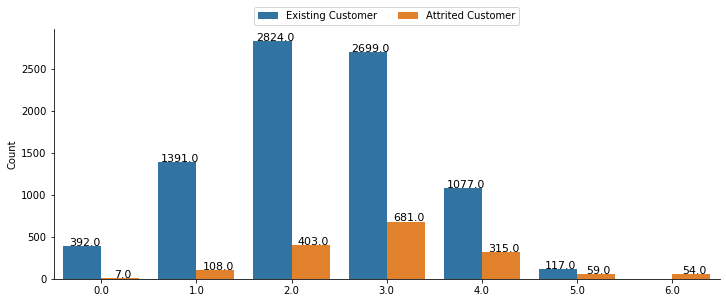

In [59]:
# Bar Plots for Absloute - Contacts_Count_Last12Months
summarized_Contacts_Count_Last12Months_df = df.groupby('Contacts_Count_Last12Months')['Attrition_Flag'].value_counts().rename('Count').reset_index()
plot = sns.catplot(data=summarized_Contacts_Count_Last12Months_df, x='Contacts_Count_Last12Months',y='Count',
                   hue='Attrition_Flag',kind='bar',legend=False, height=4, aspect=2.5);
#plot.ax.set_ylim(0,5000);
#plot.add_legend();
plot.set_xlabels(label="")
for p in plot.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() + 0.23
    txt_y = p.get_height() + 5
    plot.ax.text(txt_x,txt_y,txt,horizontalalignment='center',fontsize=11)
plt.legend(loc = 'upper center', ncol = 2, bbox_to_anchor = (0.5, 1.11));

So the above observation is a bit counterintuitive. Wherein Customers who were churning had more contacts on average, which basically mean it could be that they are unhappy with the service and complaining or contacting to cancel. So this means, that if the customers had more then 3 contacts in the last 12 months then they need to managed carefully as probability of churn would be high. 

### Next Lets look a Credit limit

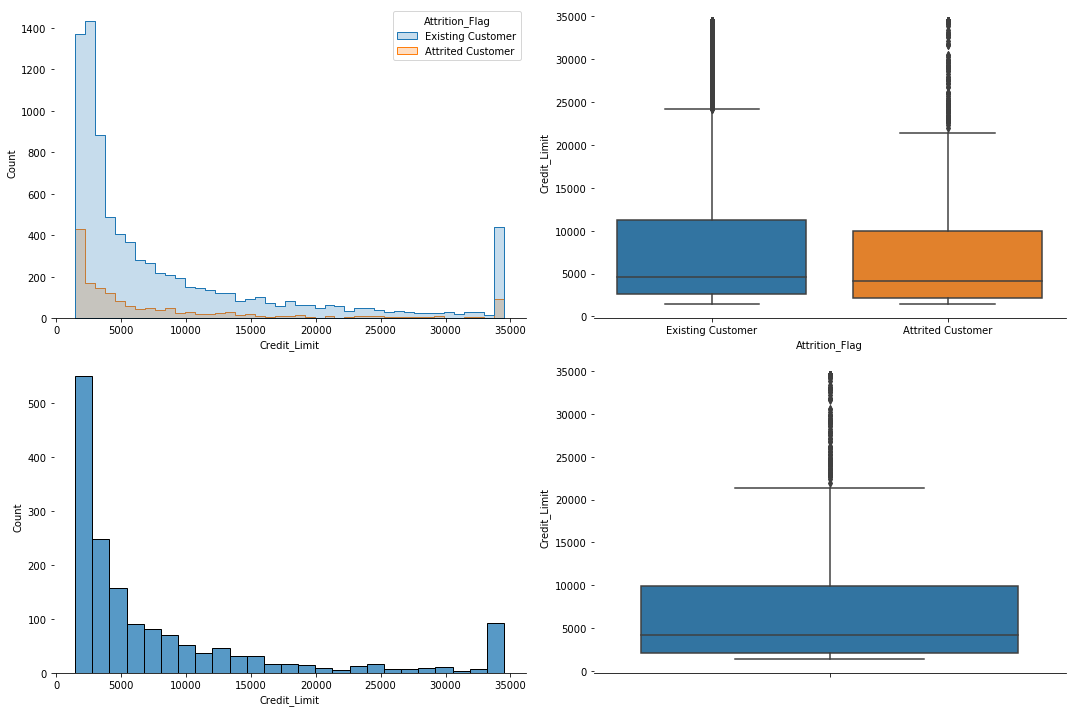

In [60]:
# Histogram and Box plots for Credit Limit feature
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.despine(left=True)
sns.histplot(data=df,x='Credit_Limit',hue='Attrition_Flag', element="step",ax=ax[0,0]);
sns.boxplot(data=df,y='Credit_Limit',x='Attrition_Flag',ax=ax[0,1]); 
sns.histplot(data=churned_df,x='Credit_Limit',ax=ax[1,0]);
sns.boxplot(data=churned_df,y='Credit_Limit',ax=ax[1,1]);
plt.tight_layout()
fig.show();

There is no siginificant differences in the distributions for Retained and Churned customers when it comes to credit limit. 

### Lets look at Revolving Balance or Avg Open to Buy or Avg Utilization 

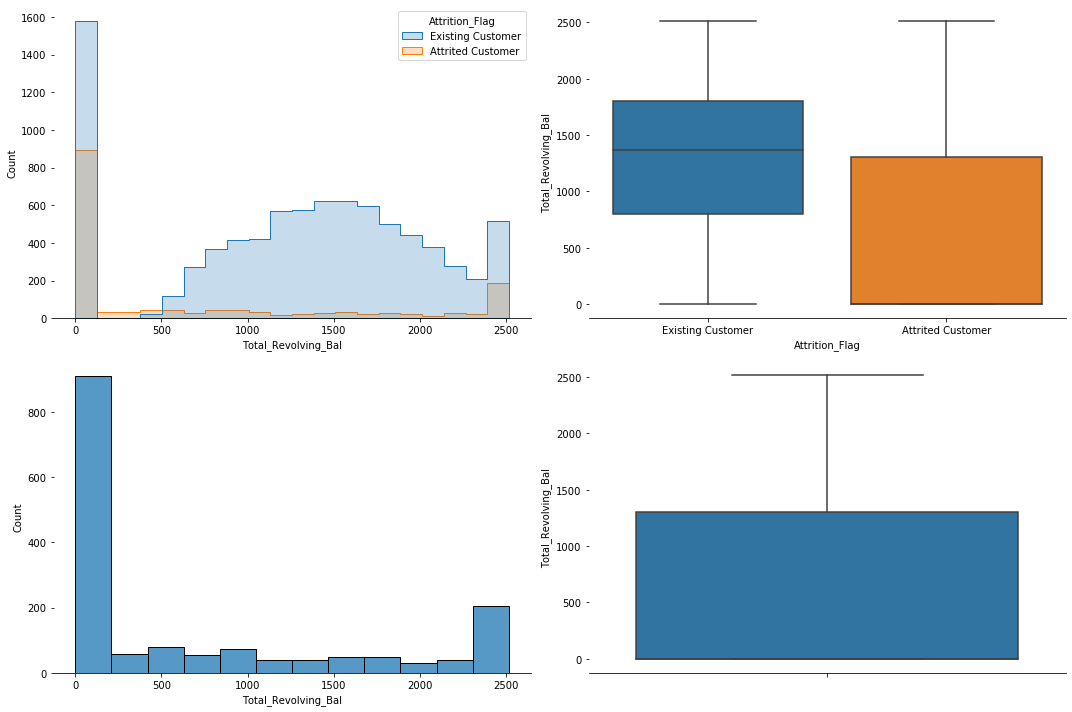

In [61]:
# Histogram and Box plots for Balance / Remaining Limit / Avg Utilization
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.despine(left=True)
sns.histplot(data=df,x='Total_Revolving_Bal',hue='Attrition_Flag', element="step",ax=ax[0,0]);
sns.boxplot(data=df,y='Total_Revolving_Bal',x='Attrition_Flag',ax=ax[0,1]); 
sns.histplot(data=churned_df,x='Total_Revolving_Bal',ax=ax[1,0]);
sns.boxplot(data=churned_df,y='Total_Revolving_Bal',ax=ax[1,1]);
plt.tight_layout()
fig.show();

It seems like the lower the customers who churned had a maintained a lower revolving balance. And this should mean they had low utilization of their cards. Lets look at mean utilization of Retained vs Chruned customers. 

In [62]:
# Summary Stats for Utilization - Grouped by Retained vd Churned
utilization_summary_df = \
df[['Attrition_Flag','Avg_Utilization_Ratio']].groupby('Attrition_Flag').mean().T.rename_axis(None,axis = 1).append(
df[['Attrition_Flag','Avg_Utilization_Ratio']].groupby('Attrition_Flag').median().T.rename_axis(None,axis = 1)
)
utilization_summary_df.index = ['Utilization_Mean', 'Utilization_Median']
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
churned_percentiles = churned_df['Avg_Utilization_Ratio'].quantile([.2, .8]).to_frame()
churned_percentiles.columns = ['Attrited Customer']
churned_percentiles.index = ['Utilization_20thPercentile', 'Utilization_80thPercentile']
retained_df = df[(df['Attrition_Flag'] == 'Existing Customer')] 
retained_percentiles = retained_df['Avg_Utilization_Ratio'].quantile([.2, .8]).to_frame()
retained_percentiles.columns = ['Existing Customer']
retained_percentiles.index = ['Utilization_20thPercentile', 'Utilization_80thPercentile']
utilization_summary_df = utilization_summary_df.append(pd.concat([churned_percentiles,retained_percentiles],axis=1))
utilization_summary_df

Attrited Customer  Existing Customer
Utilization_Mean                     0.162475           0.296412
Utilization_Median                   0.000000           0.211000
Utilization_20thPercentile           0.000000           0.032000
Utilization_80thPercentile           0.318000           0.592000

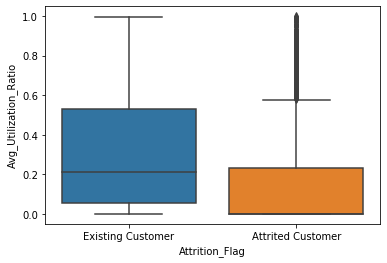

In [63]:
# Box Plots for Utilization
sns.boxplot(data=df,y='Avg_Utilization_Ratio',x='Attrition_Flag');

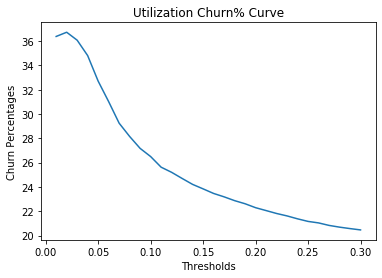

In [64]:
# Plot Churn percentages for the given dataset at various Utilization Thresholds
thresholds = np.linspace(0.01,0.30,num=30).round(3).tolist()
churn_probability = []
error = []
for val in thresholds:
    try: 
        prob = df[df['Avg_Utilization_Ratio'] < val]['Attrition_Flag'].value_counts(normalize=True).mul(100).round(3).loc['Attrited Customer']
        churn_probability.append(prob)
    except:
        error.append(val)
utilization_churn_analysis_df = pd.DataFrame({'Thresholds':thresholds,'Churn%':churn_probability}) 
utilization_churn_analysis_df.plot(x='Thresholds',y='Churn%',legend=False,
                              title = 'Utilization Churn% Curve').set_ylabel("Churn Percentages");


Taking a look at summary data again we see that:
 - Retained Customers had a mean utiization of 0.3 and median of 0.2
 - Churned Customers had a mean utiization of 0.16 and median of 0

So, since, the median value of churned customers is 0, we should take 80th percentile as an indicator, so 0.3 as a indicator, where if the utilization is below this, the customer had high probability (20%) of churn. However, since this might impact high additonal costs, I have plotted the graph so that the bank can decided if they want to work with higher probabiity, lets say 30%, then they can reduce this indicator to 0.075, which would mean any customers spending with a utilization ration above this threshold will not be identified as a risky profile customer.

### Next lets take a look at the change in transactions count and amount from q1 to q4

Earlier during outlier analysis, we had looked at count column, to understand that as the count change figure hits less then 1, the probablity starts to increase significantly. So this can be used as an indicator to reach out to customers and figure out if anything can be done to bring the count levels back up. 

Lets do the same analysis on the amount as well, although analysis on count change figures holds more sway as we are worried about frequency of transactions rather then magnitude of transactions

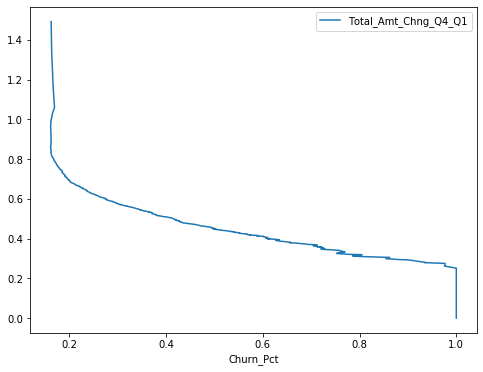

In [65]:
# Calaculate and Plot, Churn percentages in the given dataset, at varios values for Amount Change Feature. 
amt_change_q4q1_df = df[df['Attrition_Flag']=='Attrited Customer']['Total_Amt_Chng_Q4_Q1'].copy().to_frame()
amt_change_q4q1_df = amt_change_q4q1_df.drop_duplicates()
amt_change_q4q1_df['Churn_Pct'] = amt_change_q4q1_df['Total_Amt_Chng_Q4_Q1'].apply(lambda x: (df[(df.loc[:,'Total_Amt_Chng_Q4_Q1'] <= x)&(df.loc[:,'Attrition_Flag']=='Attrited Customer')].shape[0] / df[(df.loc[:,'Total_Amt_Chng_Q4_Q1'] <= x)].shape[0]))
amt_change_q4q1_df = amt_change_q4q1_df.sort_values(by='Total_Amt_Chng_Q4_Q1')
amt_change_q4q1_df.plot.line(y='Total_Amt_Chng_Q4_Q1', x='Churn_Pct', figsize=(8,6));

And it seems like, as the amount change figure hits less then 0.8, the probablity starts to increase significantly. So this can be used as an indicator to reach out to customers and figure out if anything can be done to bring the amount levels back up. 

### Next, lets take a look at Transaction Count and Amount

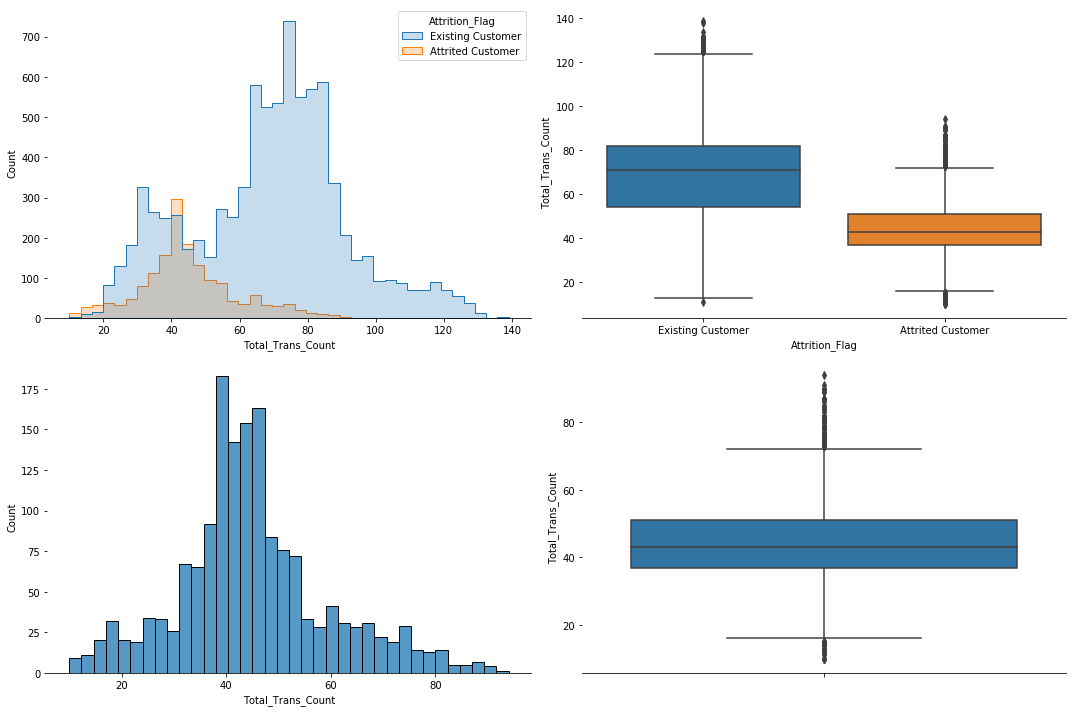

In [66]:
# Histogram and Box plots for Total Transaction Counts and Amount
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.despine(left=True)
sns.histplot(data=df,x='Total_Trans_Count',hue='Attrition_Flag', element="step",ax=ax[0,0]);
sns.boxplot(data=df,y='Total_Trans_Count',x='Attrition_Flag',ax=ax[0,1]); 
sns.histplot(data=churned_df,x='Total_Trans_Count',ax=ax[1,0]);
sns.boxplot(data=churned_df,y='Total_Trans_Count',ax=ax[1,1]);
plt.tight_layout()
fig.show();

In transactions count however, we see, that customers who churned, had a significant less transactions amount and count in the last 12 months. 

In [67]:
# Summmary Stats for Transaction Counts
trans_count_df = \
df[['Attrition_Flag','Total_Trans_Count']].groupby('Attrition_Flag').mean().T.rename_axis(None,axis = 1).append(
df[['Attrition_Flag','Total_Trans_Count']].groupby('Attrition_Flag').median().T.rename_axis(None,axis = 1)
)
trans_count_df.index = ['Transactions_Count_Mean', 'Transactions_Count_Median']
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
trans_count_churned_percentiles = churned_df['Total_Trans_Count'].quantile([.2, .8]).round(3).to_frame()
trans_count_churned_percentiles.columns = ['Attrited Customer']
trans_count_churned_percentiles.index = ['Transactions_Count_20thPercentile', 'Transactions_Count_80thPercentile']
retained_df = df[(df['Attrition_Flag'] == 'Existing Customer')] 
trans_count_retained_percentiles = retained_df['Total_Trans_Count'].quantile([.2, .8]).round(3).to_frame()
trans_count_retained_percentiles.columns = ['Existing Customer']
trans_count_retained_percentiles.index = ['Transactions_Count_20thPercentile', 'Transactions_Count_80thPercentile']
trans_count_df = trans_count_df.append(pd.concat([trans_count_churned_percentiles,trans_count_retained_percentiles],axis=1))
trans_count_df

Attrited Customer  Existing Customer
Transactions_Count_Mean                     44.93362          68.672588
Transactions_Count_Median                   43.00000          71.000000
Transactions_Count_20thPercentile           35.00000          47.000000
Transactions_Count_80thPercentile           54.00000          85.000000

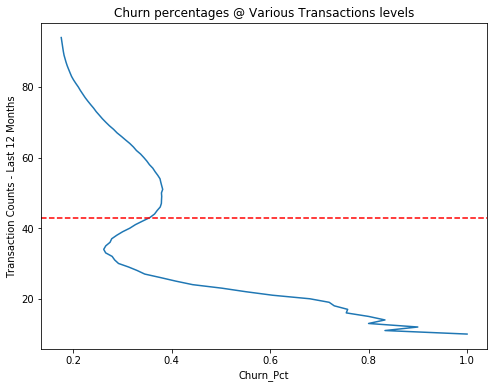

In [68]:
trans_count_df = df[df['Attrition_Flag']=='Attrited Customer']['Total_Trans_Count'].copy().to_frame()
trans_count_df = trans_count_df.drop_duplicates()
trans_count_df['Churn_Pct'] = trans_count_df['Total_Trans_Count'].apply(lambda x: (df[(df.loc[:,'Total_Trans_Count'] <= x)&(df.loc[:,'Attrition_Flag']=='Attrited Customer')].shape[0] / df[(df.loc[:,'Total_Trans_Count'] <= x)].shape[0]))
trans_count_df = trans_count_df.sort_values(by='Total_Trans_Count')
trans_count_df.plot.line(y='Total_Trans_Count', x='Churn_Pct', figsize=(8,6),legend=False,
                              title = 'Churn percentages @ Various Transactions levels').set_ylabel("Transaction Counts - Last 12 Months");
plt.axhline(y = 43, color = 'red', linestyle = '--');
#plt.axvline(x = 0.175, color = 'red', linestyle = '--');

So we see that the median of transactions counts for churned customers, is roughly half of retained customers. So we can use this as an indicator, or look at the mark of 40 transactions count in last 12 months as a mark where the customer might be at risk of being churned. 

If we want to look at short term, then 3 - 4 transactions per month is the figure, where the probability of churn increases to 40%. This along with utilization ratio indicator above, can be used to discern low utilization and hence increase probability of churn. 

Lets take a look at transaction amount

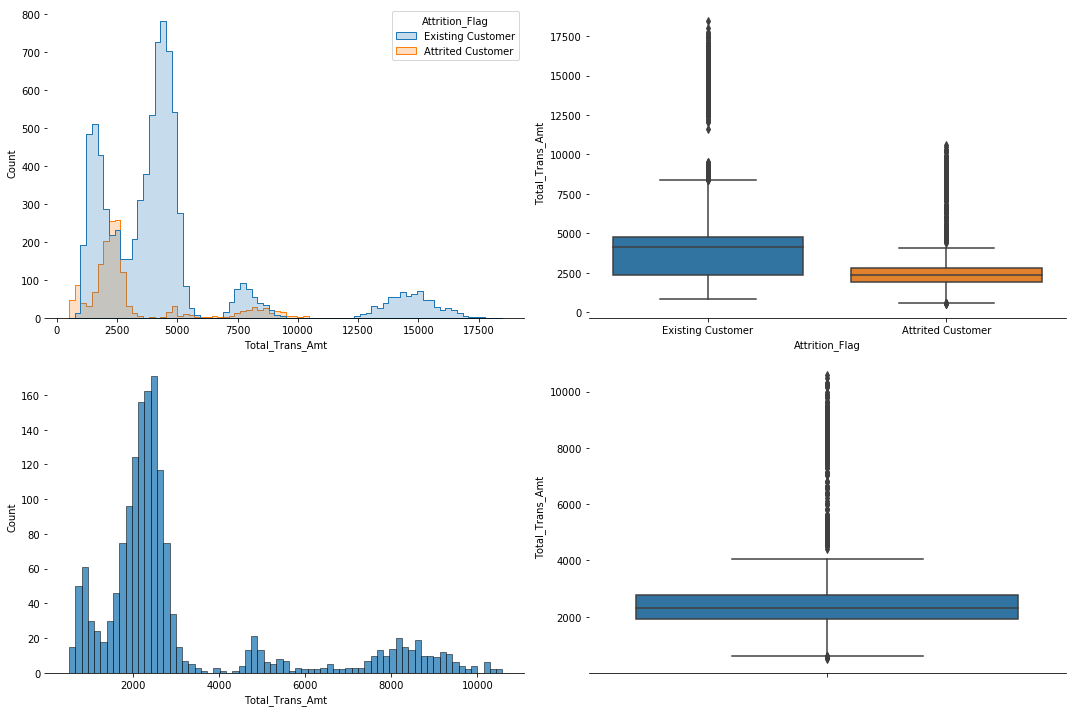

In [69]:
churned_df = df[(df['Attrition_Flag'] == 'Attrited Customer')] 
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.despine(left=True)
sns.histplot(data=df,x='Total_Trans_Amt',hue='Attrition_Flag', element="step",ax=ax[0,0]);
sns.boxplot(data=df,y='Total_Trans_Amt',x='Attrition_Flag',ax=ax[0,1]); 
sns.histplot(data=churned_df,x='Total_Trans_Amt',ax=ax[1,0]);
sns.boxplot(data=churned_df,y='Total_Trans_Amt',ax=ax[1,1]);
plt.tight_layout()
fig.show();

We see that the distribution of the total transactions (Last 12 months) displays a multimodal distribution, meaning we have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.

In [70]:
customers_mapped = {'Existing Customer':0, 'Attrited Customer':1}
df['Churn_Status'] = df['Attrition_Flag'].map(customers_mapped )

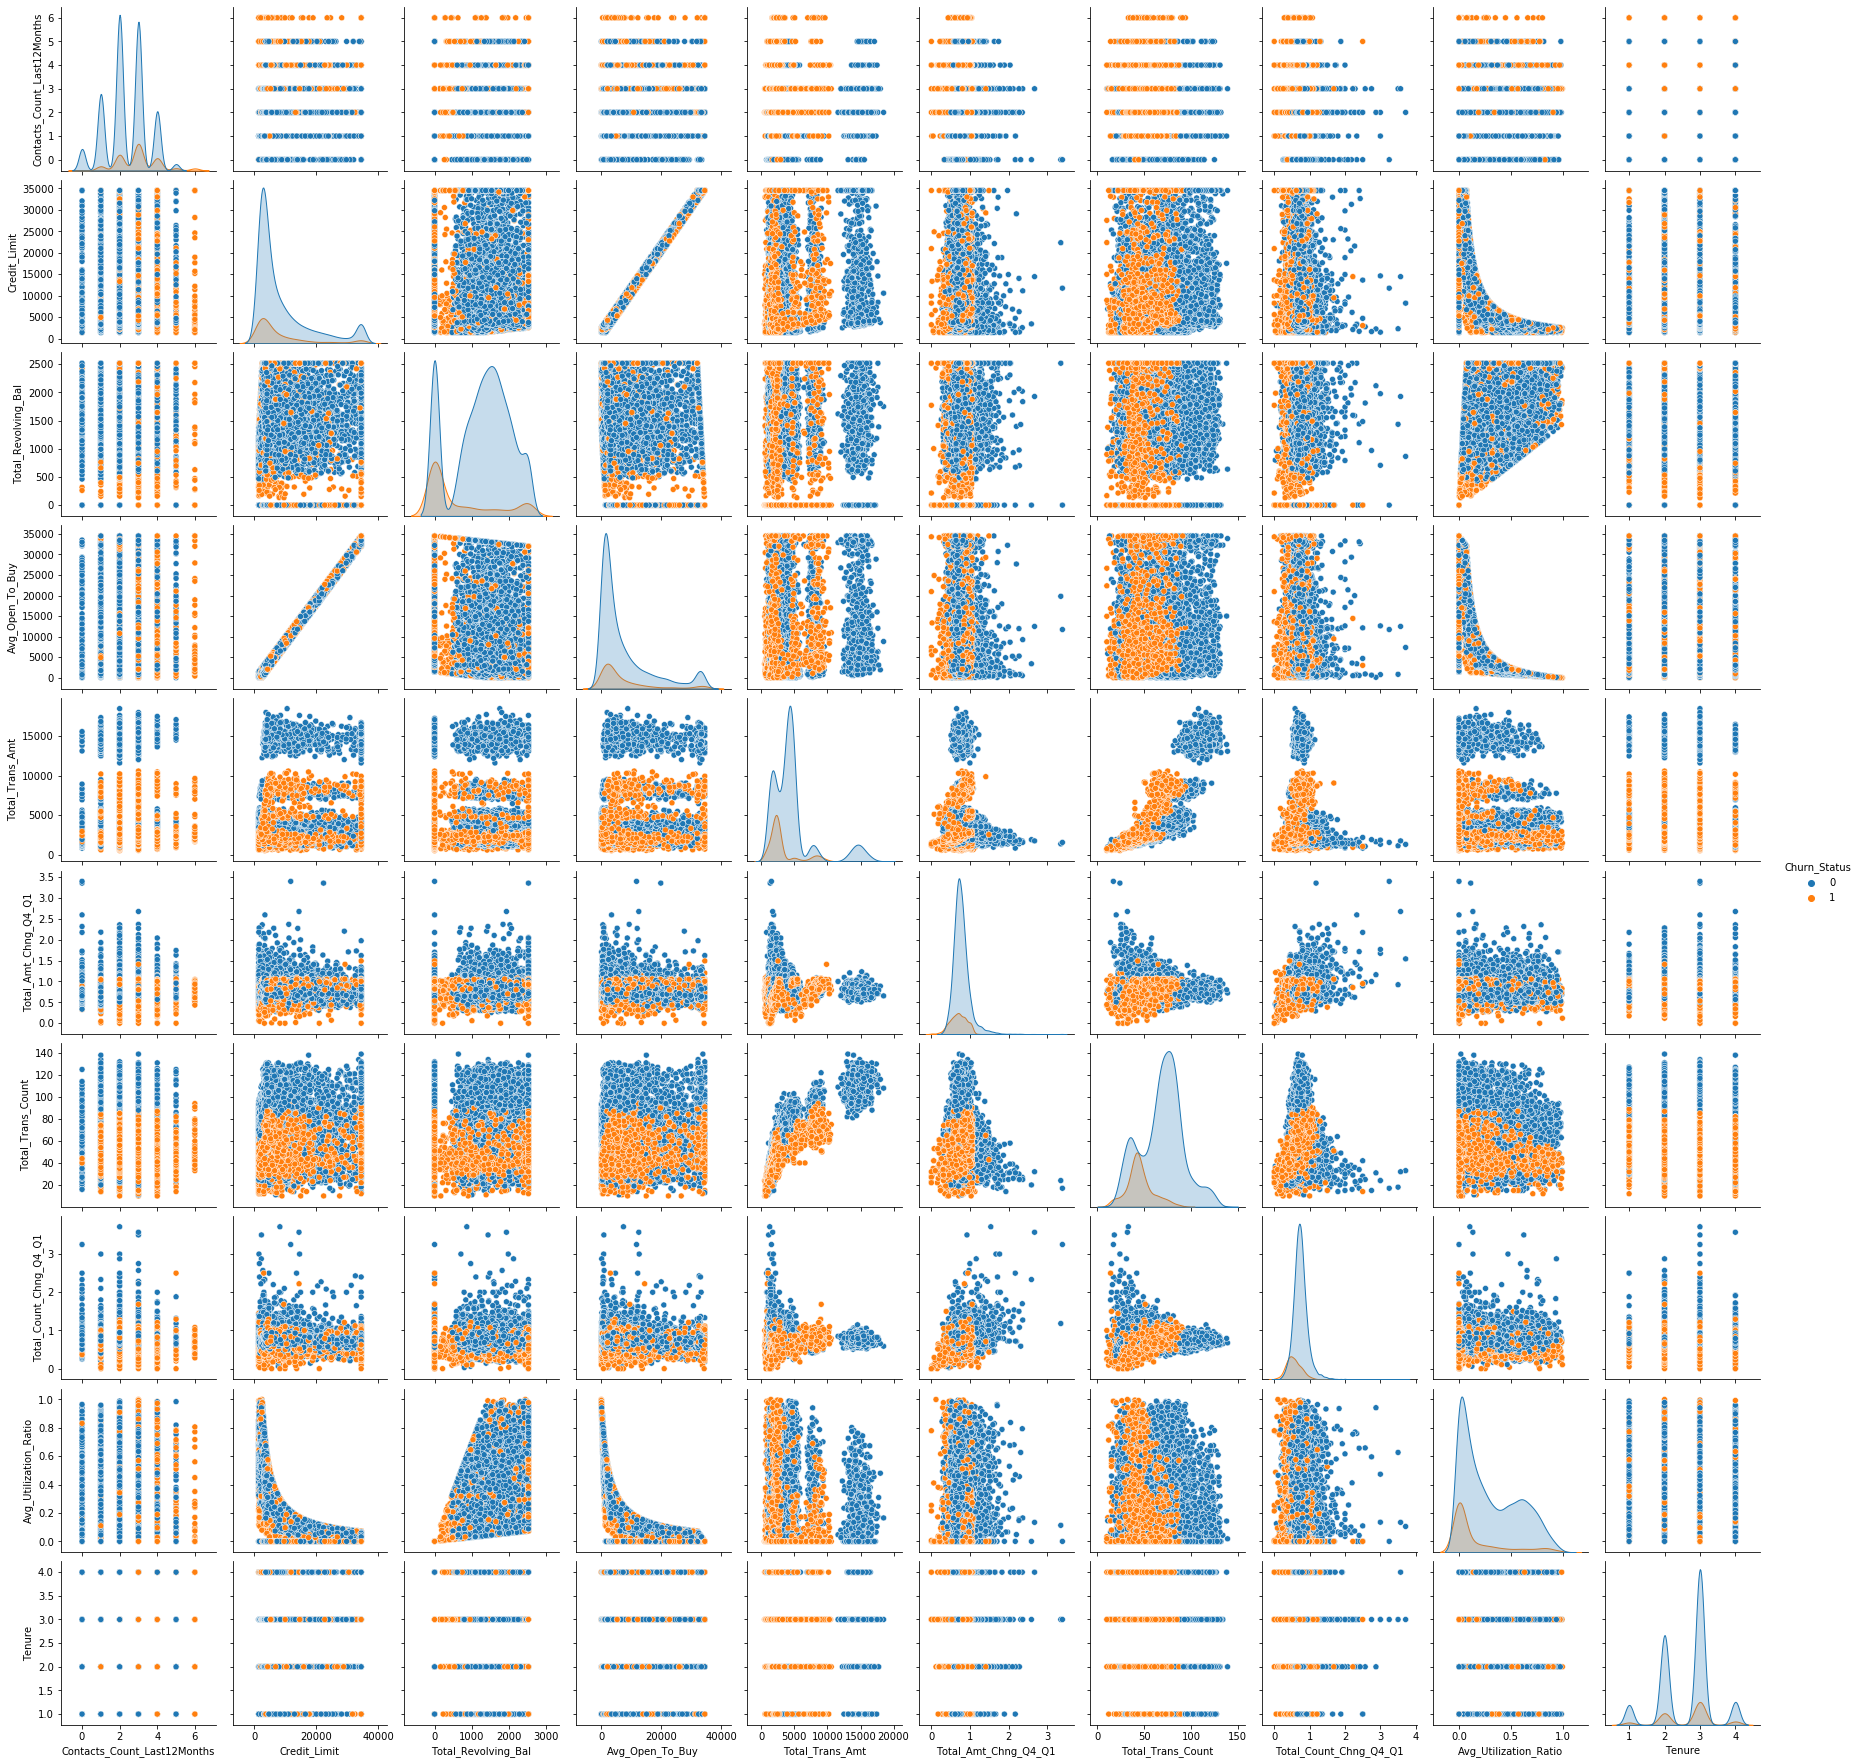

In [71]:
pplot_cols_list = df.loc[:,df.dtypes == 'float64'].columns.tolist()
pplot_cols_list.append('Churn_Status')
sns.pairplot(df[pplot_cols_list],hue = 'Churn_Status');

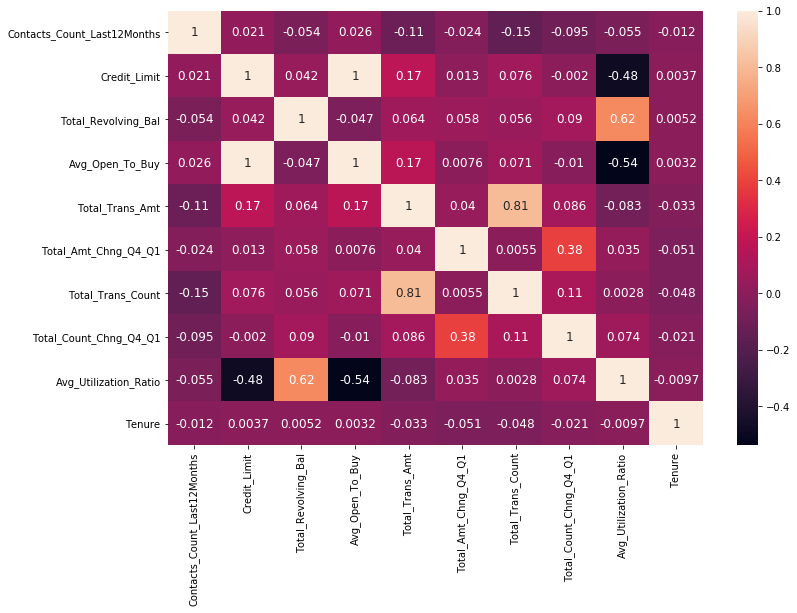

In [72]:
corr = df.loc[:,df.dtypes == 'float64'].corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True));
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

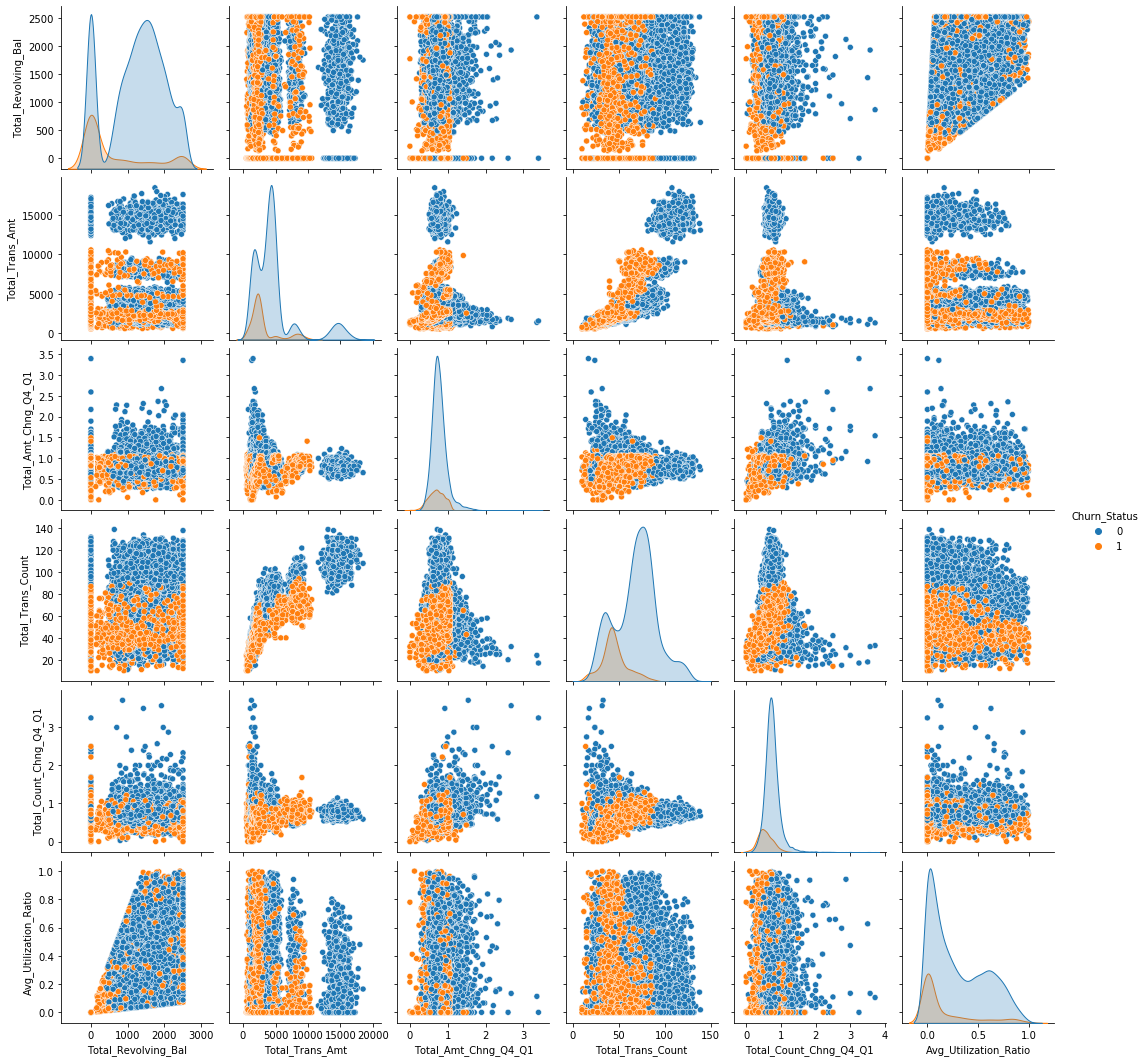

In [73]:
sub_pplot_list = ['Total_Revolving_Bal','Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Count', 'Total_Count_Chng_Q4_Q1','Avg_Utilization_Ratio','Churn_Status']
sns.pairplot(df[sub_pplot_list],hue = 'Churn_Status');

In [74]:
# plt.scatter(df.loc[:,'Total_Trans_Count'],df.loc[:,'Total_Trans_Amt'],c=df.Churn_Status,edgecolors="#000000")

The clustering of various data features, dosent seem to clearly demarcate the cluster of Retained vs Churned customers, and hence, we will move to ML modeling to predict which of the existing clientele is at risk of churn. 

### Conclusions from EDA

* The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.
* From the dataset, we can see that the bank has managed to retain 84% of the customers, and we will use this as a benchmark reference for the accuracy score or our predictive models
* Female customers on average churn more than male customers. 
* The higher the education level, the more likely the customers are going to churn.
* Customers having 3 or less products are more likely to churn. 
* If the if the customer had gone 3 - 4 months being inactive, the risk of churning shows a significant increase. Essentially, we are looking at a utilization ratio (average amount spend given credit limit) of less than 10%, where the probability of churn is more then 25%.  
* In terms of transactions trends, if we see a dip where transactions in Q4 is less then transactions in Q1, the risk of churn increases significantly. So if count of Q4 transactions is 50% of the Q1 transactions count, then the risk of churn stands at 50%. 
* In terms of absolute # of transactions count in a given month, if the count of transactions is less then 4 transactions in a month, the probability of churn is high (almost40%).

Now that we have completed the EDA, this analysis will later help us build Machine Learning models to predict whether a customer will churn or not.

Now, we will first split our dataset into test and train and using the above conclusions select columns and build a baseline logistic regression model to check the ROC-AUC Score & the confusion matrix

## Model Building and Evaluation Metrics
Since this is a binary classification problem, we could use the following 2 popular metrics:

1. Recall - (Since correctly classifying elements of the positive class (customers who churned) is more important for the bank.)
2. Area under the Receiver operating characteristic curve

Now, we are looking at the recall value here because a customer falsely marked as churn would not be as bad as a customer who was not detected as a churning customer and appropriate measures were not taken by the bank to stop him/her from churning

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

Our main metric here would be Recall values, while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes.

## Data Preprocessing. 

Data preprocessing is the process of converting raw data primarily into numeric data, that is suitable for building and training Machine Learning models. So, we first have to convert all the non numeric columns into numeric columns. We have already converted our target variable Attrion Flag into Churn Status. So lets drop that column from our dataset.

In [75]:
data = df.copy()
data.drop(columns=['Attrition_Flag'], inplace=True)

Next lets, work on the Gender column

In [76]:
data.Gender = data.Gender.replace({'F':1,'M':0})

Next we use one hot encode for all the categorical features describing different statuses of a customer.

In [77]:
data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])],axis=1)  
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Card_Category'])],axis=1)

Next we will drop the original columns containing non numeric columns, and review the updated dataset

In [78]:
data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','Customer_ID'],inplace=True)
data.sample(3)

Customer_Age  Gender  Dependent_Count  Months_On_Book  \
8834            44       1                3              26   
4290            36       1                3              31   
829             53       0                3              41   

      Total_Relationship_Count  Months_Inactive_Last12Months  \
8834                         1                             3   
4290                         4                             2   
829                          6                             1   

      Contacts_Count_Last12Months  Credit_Limit  Total_Revolving_Bal  \
8834                          1.0       10877.0               1802.0   
4290                          3.0        2909.0               2085.0   
829                           2.0        1595.0                870.0   

      Avg_Open_To_Buy  ...  $60K - $80K  $80K - $120K  Less than $40K  \
8834           9075.0  ...            0             0               1   
4290            824.0  ...            0             0               1   
829             725.0  ...            0             0               0   

      Divorced  Married  Single  Blue  Gold  Platinum  Silver  
8834         0        1       0     0     0         0       1  
4290         0        0       1     1     0         0       0  
829          0        1       0     1     0         0       0  

[3 rows x 35 columns]

### Avoiding Features that are highly correlated

In [79]:
# corr = X.corr()
# sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
# heat_map=plt.gcf()
# heat_map.set_size_inches(20,15)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()
# r_col1 = X.pop('Tenure')
# r_col2 = X.pop('Credit_Limit')
# r_col3 = X.pop('Total_Trans_Amt')
data.drop(columns = ['Tenure','Credit_Limit'],inplace=True)
data.sample(3)

Customer_Age  Gender  Dependent_Count  Months_On_Book  \
8220            54       1                3              38   
7157            49       1                0              30   
8415            41       0                2              28   

      Total_Relationship_Count  Months_Inactive_Last12Months  \
8220                         2                             2   
7157                         3                             2   
8415                         2                             1   

      Contacts_Count_Last12Months  Total_Revolving_Bal  Avg_Open_To_Buy  \
8220                          4.0               1012.0           1440.0   
7157                          0.0               1112.0            492.0   
8415                          1.0                993.0           6300.0   

      Total_Trans_Amt  ...  $60K - $80K  $80K - $120K  Less than $40K  \
8220           2398.0  ...            0             0               1   
7157           4253.0  ...            0             0               1   
8415           4828.0  ...            1             0               0   

      Divorced  Married  Single  Blue  Gold  Platinum  Silver  
8220         0        1       0     1     0         0       0  
7157         0        1       0     1     0         0       0  
8415         0        0       1     1     0         0       0  

[3 rows x 33 columns]

### Seperating Features and Target

Next we separete target feature (y) from other features (X).

In [80]:
y = data.Churn_Status.values
X = data.drop(['Churn_Status'], axis=1)

### Features Scaling

Feature scaling is a technique used to normalise the range of features in a dataset as some algorithms are sensitive to the scale or magnitude of the values within the features and may be features with higher magnitude, influence the model performance.

I decided to use MinMaxScaler() which subtracts the minimum value in the column, and then divides by the difference, between the original maximum and original minimum. 

This kind of scaling preserves teh shape of the original distribution and dosent reduce the importance of the outliers i.e. it is the leasdt disruptive to the information in the original data. 

In [81]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit(X).transform(X)

## Splitting the data into train and test split

I am going to split my data set into as train (X_train, y_train) and test (X_test, y_test) datasets. Then I am going to teach my machine learning algorithms by using trainig data set. Later I will use my trained model to predict my test data (y_pred). Finally I will compare my predictions (y_pred) with my test data (y_test).

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [83]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''
    percent = False

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Addressing Class Imbalance - Combination (Over and Under) Sampling

As we have seen previously, there is an imbalance in the classes to be predicted, with one class (0 – retained) much more prevalent than the other (1 - churned):

In [84]:
from collections import Counter
Counter(y_train)

Counter({0: 6781, 1: 1320})

Classification using imbalanced data is biased in favor of the majority class, meaning that machine learning algorithms will likely result in models that do little more than predict the most common class. Additionally, common metrics can be misleading when handling class-imbalanced data (e.g. if a dataset contains 99.9% 0s and 0.01% 1s, a classifier that always predicts 0 will have 99.9% accuracy).

I decided to use the SMOTE ('Synthetic Minority Oversampling Technique') algorithm which,'finds a record that is similar to the record being upsampled and creates a synthetic record that is a randomly weighted average of the original record and the neighboring record, where the weight is generated separately for each predictor'.

So in this method of BALANCING, we do some over sample of the minority set, and some under sample of the majority set. And the reason we do this is because each of the methods individually (i.e. undersampling and oversampling) have drawbacks. Undersampling is not always realistic, due to limited data and can result in underfitting. And you dont want to loose information when you do undersampling. And oversampling can result in overfitting, as it can focus on wrong data, that may never be seen again, as it is specific to the dataset being used for the model. And another disadvantage with oversampling is that oversampling with SMOTE can result in noisy data due to outliers. And hence we use the combine method called SMOTEENN which combines the two methodologies. 
1) First we oversample the minority class
2) And then we CLEAN the resulting data using an undersampling strategy, where it will drop observations, if they are TOO SIMILAR to each other. 

In [85]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN

enn = SMOTEENN()
X_train, y_train = enn.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_train)

Counter({0: 4390, 1: 6389})

## Running Different Models to see which one performs better

Our aim is to choose the model that provides the best accuracy and recall scores. And hence, we will try different machine learning algorithms in order to get an idea about which machine learning algorithm performs better. Also, we will perform a accuracy comparison amoung them.

In [86]:
from sklearn.linear_model import LogisticRegression

XGBoost converts weak learners to strong learners through an ensemble method. Unlike bagging, in the classical boosting the subset creation is not random and depends upon the performance of the previous models.

### Simple Logistic Regression

So at first we will not derive any new features to develop the predictive model, rather we will use all the input variables / columns / data attributes / features to get the least baseline accuracy.

In [87]:
lr_model1 = LogisticRegression()
lr_model1.fit(X_train, y_train)
y_pred = lr_model1.predict(X_test)

In [88]:
# Calculate the accuracy score and balanced accuracy score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, \
                            precision_score, recall_score, precision_recall_curve, balanced_accuracy_score
# round(balanced_accuracy_score(y_test, y_pred),3)
round(accuracy_score(y_test, y_pred),3)

0.805

The score show us that in 80% of the cases our model predicted the right outcome for our binary classification problem. That’s considered quite good for a first run, especially when we look which impact each variable has and if that makes sense. So with the final objective to reduce churn and take the right preventing actions in time, we want to know which independent variables have to most influence on our predicted outcome. Therefore we look at the coefficients in our model and look at the weights of each variable.

In [89]:
# To get the weights of all the variables
weights = pd.Series(lr_model1.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

Total_Trans_Amt                  6.683946
Months_Inactive_Last12Months     3.830150
Contacts_Count_Last12Months      3.704713
Gender                           1.177191
Dependent_Count                  1.021319
Gold                             0.967273
$120K +                          0.609092
$80K - $120K                     0.477115
Single                           0.402091
Divorced                         0.249557
$60K - $80K                      0.167354
Less than $40K                   0.106514
Customer_Age                     0.072768
Avg_Open_To_Buy                  0.042030
$40K - $60K                      0.000783
Doctorate                       -0.027938
Post-Graduate                   -0.065638
Married                         -0.120086
Platinum                        -0.147959
Silver                          -0.326880
College                         -0.389989
High School                     -0.399432
Uneducated                      -0.470964
Blue                            -0

It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation. A positive value has a positive impact on our predicted variable i.e. that value will also increase the probability of customer to churn. On the other hand, a highly negative relation to the predicted variable, means that customers with that variable are unlikely to churn. 

### AUC ROC Curve & Confusion Matrix 

Now, let us quickly look at the AUC-ROC curve for our logistic regression model and also the confusion matrix to see where the logistic regression model is failing here.

Accuracy is the proportion of true positives and negatives in the whole data set. It determines if a value is accurate compare it to the accepted value; the nearness of a calculation to the true value.

AUC (area under the ROC receiver operating characteristic curve) measures how true positive rate (recall) and false positive rate trade off, so in that sense it is already measuring something else. More importantly, AUC is not a function of threshold. It is an evaluation of the classifier as threshold varies over all possible values. It is in a sense a broader metric, testing the quality of the internal value that the classifier generates and then compares to a threshold.

Accuracy vs AUC: The accuracy depends on the threshold chosen, whereas the AUC considers all possible thresholds. Because of this it is often preferred as it provides a “broader” view of the performance of the classifier, but they still measure different things and as such using one or the other is problem-dependent.

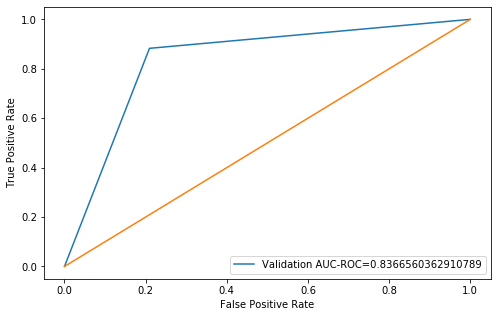

In [90]:
fpr, tpr, _ = roc_curve(y_test, y_pred) 
auc = roc_auc_score(y_test, y_pred) 
plt.figure(figsize=(8,5)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [91]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1359,  360],
       [  36,  271]], dtype=int64)

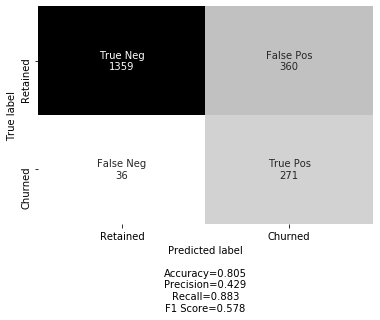

In [92]:
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Retained', 'Churned']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='binary',figsize=(6,4), cbar=False)

In [93]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print ('Logistic Regression Combined sampling Report')
print(classification_report_imbalanced(y_test, y_pred))

Logistic Regression Combined sampling Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.79      0.88      0.87      0.84      0.69      1719
          1       0.43      0.88      0.79      0.58      0.84      0.70       307

avg / total       0.89      0.80      0.87      0.83      0.84      0.69      2026



In [94]:
# Recall Score
recall_score(y_test,y_pred)

0.8827361563517915

In [95]:
# features_label = X.columns

# Resample the training data with the BalancedRandomForestClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier
# brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)
# brf.fit(X, y)
# importances = brf.feature_importances_
# importances_sorted = sorted(zip(brf.feature_importances_, X.columns), reverse=True)
# # importances_sorted[:10]

# # Visualize the features by importance
# importances_df = pd.DataFrame(importances_sorted[:9])
# importances_df.set_index(importances_df[1], inplace=True)
# importances_df.drop(columns=1,inplace=True)
# importances_df.rename(columns={0:'Features Importances'},inplace=True)
# importances_df = importances_df.sort_values(by='Features Importances')
# importances_df.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False);

So now that we have run the primitive classifier model and have the score from that, we will use this as a reference, to first, run, other classifier algorithms, and then compare the scores to the base model. 

And after that, we will fine tune our features and see if we can optimize the models performance, due to the updated hyperparameters, and compare the score again to this baseline model. 

In [96]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [97]:
first_models = []
first_models.append(('Decision Trees', DecisionTreeClassifier()))
first_models.append(('Random Forest', RandomForestClassifier()))
first_models.append(('Gradient Boosting', GradientBoostingClassifier()))
first_models.append(('AdaBoost', AdaBoostClassifier()))
first_models.append(('XGBoost', XGBClassifier(objective = "binary:logistic", eval_metric = "logloss")))
first_models.append(("LightGBM", LGBMClassifier()))
first_models.append(("CatBoost", CatBoostClassifier(verbose = False)))

# evaluate each model in turn
names = []
accuracy = []
roc_auc = []
recalls = []
precisions = []
confusion_matrixs = []
feature_importances = []
roc_curves = []

In [98]:
for name, model in first_models:
        fitted_model = model.fit(X_train, y_train)
        y_pred = fitted_model.predict(X_test)
        names.append(name)
        accuracy.append(accuracy_score(y_test, y_pred))
        roc_auc.append(roc_auc_score(y_test, y_pred))
        recalls.append(recall_score(y_test,y_pred))
        precisions.append(precision_score(y_test,y_pred))
        cf_matrix = confusion_matrix(y_test, y_pred)
        confusion_matrixs.append(cf_matrix)
        feature_imp = pd.Series(fitted_model.feature_importances_, index=X.columns).sort_values(ascending=False)
        feature_importances.append(feature_imp)
        roc_curves.append(roc_curve(y_test, fitted_model.predict_proba(np.array(X_test))[:,1]))

In [99]:
svm_model1 = SVC(kernel='linear',probability=True)
fitted_svm_model1 = svm_model1.fit(X_train, y_train)
y_pred = fitted_svm_model1.predict(X_test)
svm_model1_importances = pd.Series(fitted_svm_model1.coef_[0], index=X.columns.values).sort_values(ascending = False)
svm_model1_cf_matrix = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_pred))
recalls.append(recall_score(y_test,y_pred))
precisions.append(precision_score(y_test,y_pred))
names.append('Support Vector')
roc_curves.append(roc_curve(y_test, fitted_svm_model1.predict_proba(np.array(X_test))[:,1]))

In [100]:
comparison_matrix = {'Accuracy Scores': accuracy, 'AUC Scores': roc_auc, 'Recall Scores': recalls, 'Precision Scores': precisions}
comparison_df = pd.DataFrame(comparison_matrix, index = names)
comparison_df = comparison_df.sort_values(by=['Recall Scores','AUC Scores','Accuracy Scores'], ascending=False)
comparison_df.style.highlight_max(color = 'indianred', axis = 0)

Lets look at which features are the most important. In order to find that out, we are going to train the model using the Random Forest classifier. After that, we will have a rough idea about the important features for us.

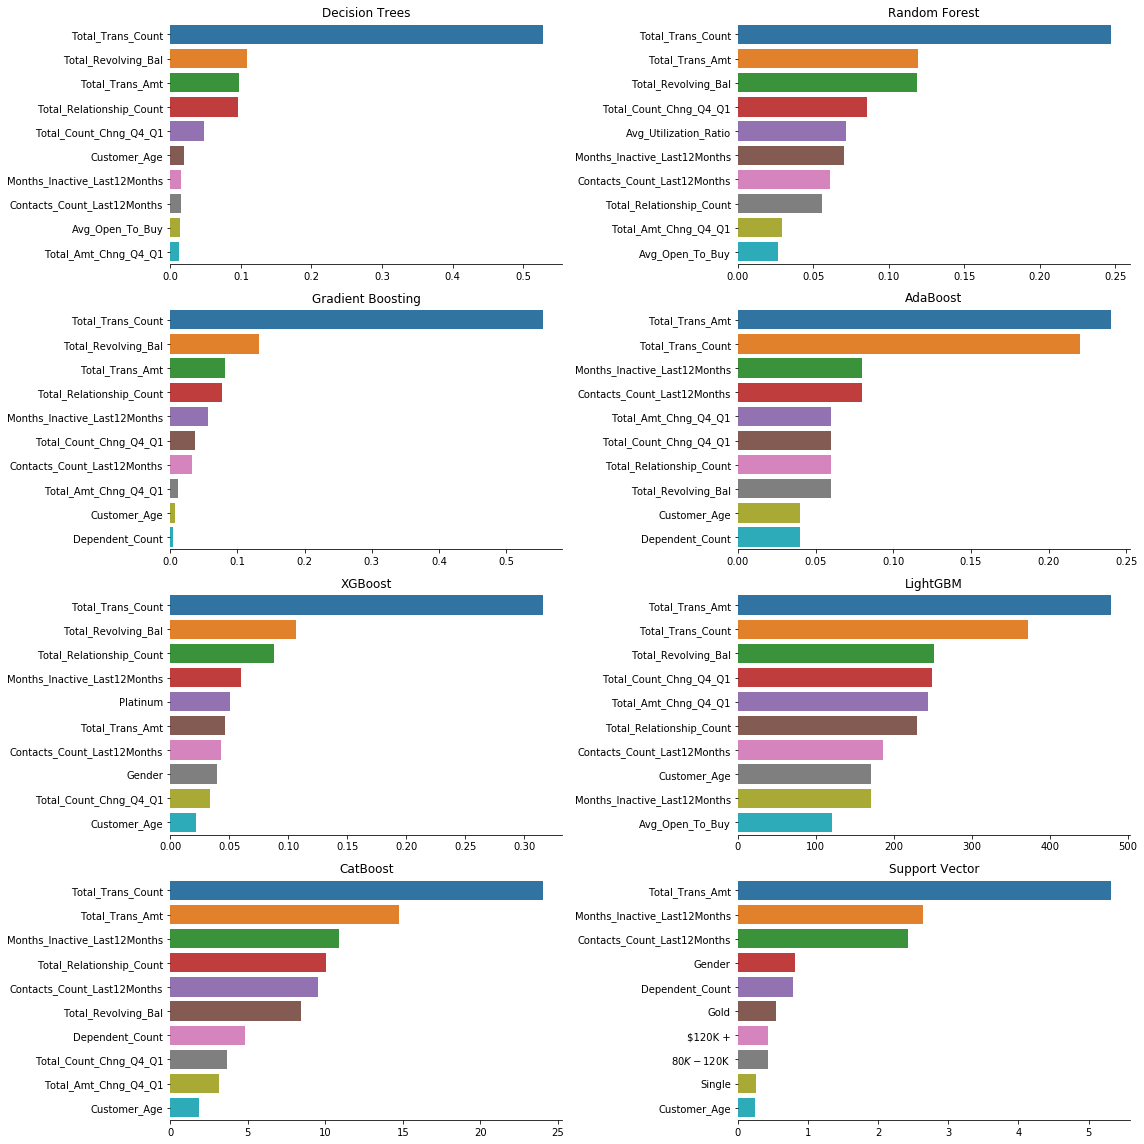

In [101]:
fig, ax = plt.subplots(4,2,figsize=(16, 16))
sns.despine(left=True)
sns.barplot(x=feature_importances[0][:10], y=feature_importances[0][:10].index, ax=ax[0,0]).set_title(names[0])
sns.barplot(x=feature_importances[1][:10], y=feature_importances[1][:10].index, ax=ax[0,1]).set_title(names[1])
sns.barplot(x=feature_importances[2][:10], y=feature_importances[2][:10].index, ax=ax[1,0]).set_title(names[2])
sns.barplot(x=feature_importances[3][:10], y=feature_importances[3][:10].index, ax=ax[1,1]).set_title(names[3])
sns.barplot(x=feature_importances[4][:10], y=feature_importances[4][:10].index, ax=ax[2,0]).set_title(names[4])
sns.barplot(x=feature_importances[5][:10], y=feature_importances[5][:10].index, ax=ax[2,1]).set_title(names[5])
sns.barplot(x=feature_importances[6][:10], y=feature_importances[6][:10].index, ax=ax[3,0]).set_title(names[6])
sns.barplot(x=svm_model1_importances[:10], y=svm_model1_importances[:10].index, ax=ax[3,1]).set_title(names[7])
plt.tight_layout()
fig.show();

The graph above shows the features with the highest importance value to the lowest importance value. It shows the most important features are Transaction Amount, Transaction Count, Months in Active, Relationship Count, Revolving Balance, and so on. The bank could use these findings to adapt and improve its services in a way that increases satisfaction for those customers who more likely to churn.

Lets also look at the confusion matrixes

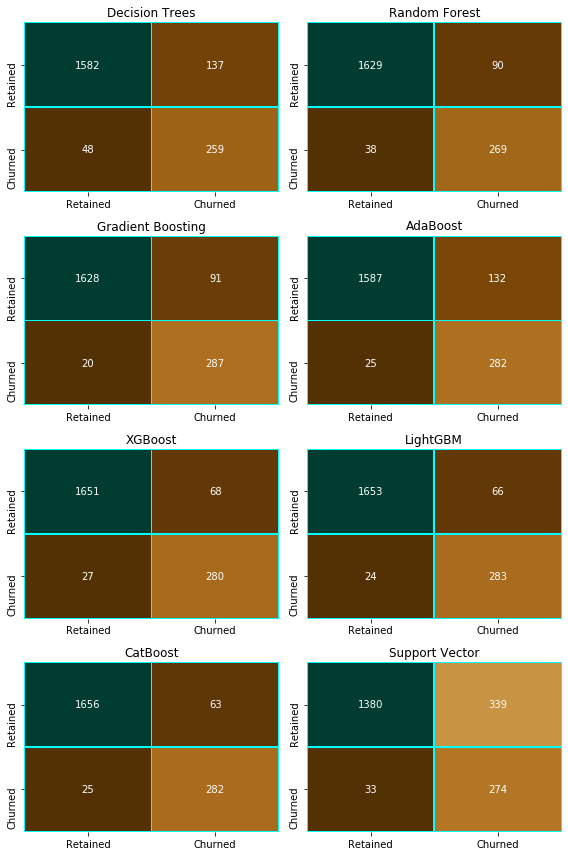

In [102]:
fig, ax = plt.subplots(4,2,figsize=(8, 12))
sns.despine(left=True)
sns.heatmap(data=confusion_matrixs[0], annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[0,0], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[0])
sns.heatmap(data=confusion_matrixs[1], annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[0,1], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[1])
sns.heatmap(data=confusion_matrixs[2], annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[1,0], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[2])
sns.heatmap(data=confusion_matrixs[3], annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[1,1], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[3])
sns.heatmap(data=confusion_matrixs[4], annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[2,0], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[4])
sns.heatmap(data=confusion_matrixs[5], annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[2,1], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[5])
sns.heatmap(data=confusion_matrixs[6], annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[3,0], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[6])
sns.heatmap(data=svm_model1_cf_matrix, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax[3,1], cmap='BrBG', xticklabels=categories, yticklabels=categories, cbar=False).set_title(names[7])
plt.tight_layout()
fig.show();

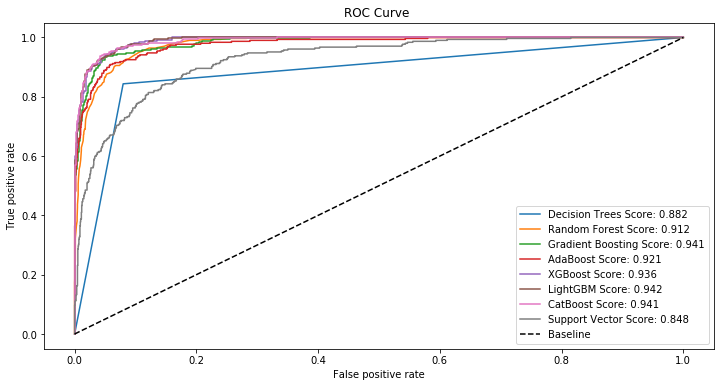

In [103]:
# Plot the roc curves
plt.figure(figsize = (12,6), linewidth= 1)
for i in range(8):
    fpr, tpr, _ = roc_curves[i]
    plt.plot(fpr, tpr, label = f'{names[i]} Score: ' + str(round(roc_auc[i], 3)))
plt.plot([0,1], [0,1], 'k--', label = 'Baseline')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

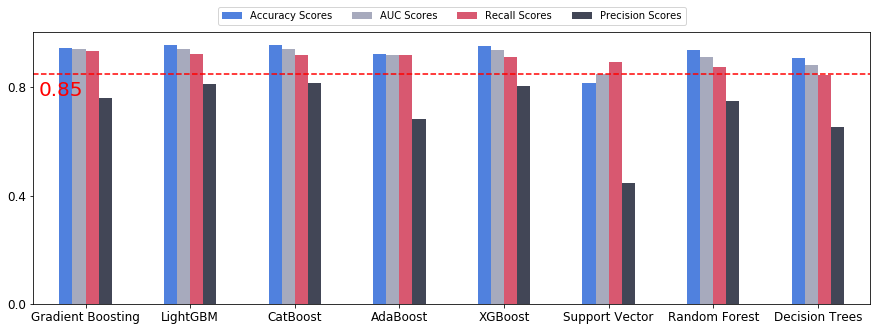

In [104]:
comparison_df.plot(kind = 'bar', figsize = (15, 5), fontsize = 12, color = ['#5081DE', '#A7AABD', '#D85870', '#424656'])

plt.legend(loc = 'upper center', ncol = len(comparison_df.columns), bbox_to_anchor = (0.5, 1.11))
plt.xticks(rotation = 0)
plt.yticks([0, 0.4, 0.8])

plt.axhline(y = 0.85, color = 'red', linestyle = '--')
plt.text(x = -0.45, y = 0.77, s = '0.85', size = 20, color = 'red');

### And the winning algorithm is: CatBoost Classifier:

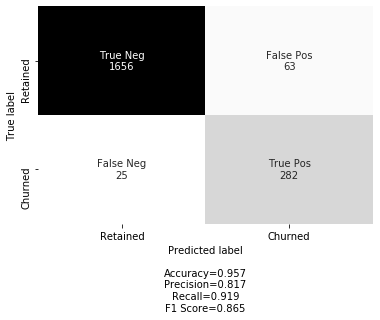

In [105]:
make_confusion_matrix(confusion_matrixs[6], group_names=labels, categories=categories, cmap='binary',figsize=(6,4), cbar=False)

## Conclusions so far:

I was working on this projet as part of my capstone project for Data Analysis. The work above so far suffices for the requirements of the capstone project itself, wherein the aim was to do some predictive modelling on how likely it is that the customer will churn, so that the bank can put take some measures to prevent churn and hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model. 

Given that in the data iteslf, we only had 16% as churned customers percentage, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

The conclusions from EDA are documented in the EDA section above. And from the modeling phase, we can see that, the Boosting Algotithms all perform well having maximum accuracy and recall scores in the region of 93% to 95%. Other classifiers, such as logistic regression, and RandomForest do not perform well on the validation set. From this stage onward, we will work with the boosting classifiers classifiers to improve their accuracy score.

### Further work in Future

Further work that I would be doing, post course completion is, 
 - running optimization and hyperparameter tuning for the bossting algorithms in order to further improve the score. 
 - I would also, be introducing some new features such as signals for potential chrun circumstances, that I discovered during the EDA process above. 
 - I also plan to run, PCA, and Reverse Feature Elimination or Backward selection to select the best features, to see if we can further improve models performance. 
 - And finally, we can combine the predictions of all these classifiers to see if we get better predictive performance compared to each constituent individual classifier. This is the main motivation behind Ensemble Learning. Specifically, I will use Soft Voting. In this case, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote. 

## Optimization and Hyperparameter Tuning

Using default hyperparameters usually results in non-optimised models that overfit or underfit the dataset. Hyperparameter tuning is the process of finding the set of hyperparameter values that achieves optimal performance. For this purpose, we will pass some parameters to Scikit-Learn’s GridSearchCV which then evaluates all the possible combinations of hyperparameter values. As mentioned earlier, recall will be used as the scoring metric for optimising our models.

GridSearchCV evaluates performance by performing k-fold cross-validation. The idea behind k-fold cross-validation, is simple: it splits the (training) set into k subsets/folds, trains the models using k-1 folds, and evaluates the model on the remaining one fold. This process is repeated until every fold is tested once.

In [106]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score, GridSearchCV